<a href="https://colab.research.google.com/github/akhmalas11/Skripsiclustering/blob/main/Skripsi_Kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

# Proses membaca Data

In [ ]:
data = pd.read_excel("/content/Persentase Rumah Tangga yang Menggunakan Jamban.xlsx")
data1= pd.read_excel("/content/Persentase Penduduk Miskin Usia 15 Tahun ke Atas 2023.xlsx")
data2= pd.read_excel("/content/Persentase Penduduk Miskin Usia 15 Tahun ke Atas Lapangan kerja utama.xlsx")
data3= pd.read_excel("/content/Persentase Penduduk Miskin Usia 15 Tahun ke Atas pendidiksn tertinggi.xlsx")
data4= pd.read_excel("/content/Persentase Pengeluaran per Kapita per Bulan Rumah Tangga(k.makan).xlsx")
data5= pd.read_excel("/content/Indeks Kedalaman Kemiskinan (P1), 2024.xlsx")
data6= pd.read_excel("/content/Indeks Keparahan Kemiskinan (P2), 2024.xlsx")
data7= pd.read_excel("/content/Indeks Pembangunan Manusia Menurut Kabupaten_Kota di Provinsi Jawa Tengah, 2023.xlsx")
data8= pd.read_excel("/content/Kemiskinan, 2024.xlsx")
data9= pd.read_excel("/content/Tingkat Pengangguran Terbuka (TPT) di Provinsi Jawa Tengah, 2023.xlsx")

## data menggunakan jamban

In [ ]:
data.drop('No', axis=1)

,Kabupaten/Kota,Miskin,Tidak Miskin,Miskin dan tidak miskin
0,Kabupaten Cilacap,83.18,94.86,93.93
1,Kabupaten Banyumas,91.63,95.87,95.47
2,Kabupaten Purbalingga,88.36,97.21,96.27
3,Kabupaten Banjarnegara,91.14,92.67,92.47
4,Kabupaten Kebumen,94.89,98.86,98.33
5,Kabupaten Purworejo,94.48,95.98,95.85
6,Kabupaten Wonosobo,86.21,96.62,95.19
7,Kabupaten Magelang,90.61,95.32,94.91
8,Kabupaten Boyolali,84.85,97.74,96.62
9,Kabupaten Klaten,93.77,98.45,97.95


In [ ]:
data

,No,Kabupaten/Kota,Miskin,Tidak Miskin,Miskin dan tidak miskin
0,1,Kabupaten Cilacap,83.18,94.86,93.93
1,2,Kabupaten Banyumas,91.63,95.87,95.47
2,3,Kabupaten Purbalingga,88.36,97.21,96.27
3,4,Kabupaten Banjarnegara,91.14,92.67,92.47
4,5,Kabupaten Kebumen,94.89,98.86,98.33
5,6,Kabupaten Purworejo,94.48,95.98,95.85
6,7,Kabupaten Wonosobo,86.21,96.62,95.19
7,8,Kabupaten Magelang,90.61,95.32,94.91
8,9,Kabupaten Boyolali,84.85,97.74,96.62
9,10,Kabupaten Klaten,93.77,98.45,97.95


## data bekerja di informal dan formal

In [ ]:
data1.drop('No', axis=1)

,Kabupaten/Kota,Tidak Bekerja,Sektor Informal,Sektor Formal,Total
0,Kabupaten Cilacap,47.64,42.17,10.19,100
1,Kabupaten Banyumas,42.56,37.80,19.64,100
2,Kabupaten Purbalingga,36.30,40.32,23.38,100
3,Kabupaten Banjarnegara,34.23,48.21,17.56,100
4,Kabupaten Kebumen,34.22,51.34,14.44,100
5,Kabupaten Purworejo,38.01,48.29,13.70,100
6,Kabupaten Wonosobo,34.94,53.12,11.94,100
7,Kabupaten Magelang,35.82,49.41,14.78,100
8,Kabupaten Boyolali,33.49,51.41,15.10,100
9,Kabupaten Klaten,43.89,29.78,26.34,100


## data yang bekerja di sektor pertanian

In [ ]:
data2.drop('No', axis=1)


,Kabupaten/Kota,Tidak Bekerja,Bekerja di Sektor Pertanian,Bekerja Bukan di Sektor Pertanian,Total
0,Kabupaten Cilacap,47.64,25.31,27.05,100
1,Kabupaten Banyumas,42.56,14.91,42.53,100
2,Kabupaten Purbalingga,36.30,26.91,36.79,100
3,Kabupaten Banjarnegara,34.23,35.58,30.19,100
4,Kabupaten Kebumen,34.22,36.40,29.38,100
5,Kabupaten Purworejo,38.01,29.61,32.38,100
6,Kabupaten Wonosobo,34.94,39.74,25.32,100
7,Kabupaten Magelang,35.82,35.49,28.69,100
8,Kabupaten Boyolali,33.49,42.89,23.62,100
9,Kabupaten Klaten,43.89,10.51,45.61,100


## data tingkat lulusan sekolah

In [ ]:
data3.drop('No',axis=1)

,Kabupaten/Kota,Tidak/Belum Tamat SD,Tamat SD/SLTP,SLTA+,Total
0,Kabupaten Cilacap,30.84,55.84,13.32,100
1,Kabupaten Banyumas,20.16,60.82,19.02,100
2,Kabupaten Purbalingga,30.94,58.85,10.21,100
3,Kabupaten Banjarnegara,34.24,51.78,13.98,100
4,Kabupaten Kebumen,23.66,59.08,17.26,100
5,Kabupaten Purworejo,24.52,43.12,32.36,100
6,Kabupaten Wonosobo,32.59,58.68,8.73,100
7,Kabupaten Magelang,25.52,53.48,21.00,100
8,Kabupaten Boyolali,35.65,43.12,21.22,100
9,Kabupaten Klaten,19.50,45.54,34.96,100


## data RT dengan pengeluaran perkapita

In [ ]:
data4.drop('No',axis=1)

,Kabupaten/Kota,Maret 2019,Maret 2020,Maret 2021,Maret 2022,Maret 2023
0,Kabupaten Cilacap,62.10,61.32,62.55,64.82,63.99
1,Kabupaten Banyumas,60.14,60.55,63.10,61.56,58.75
2,Kabupaten Purbalingga,62.67,61.75,61.24,62.49,64.70
3,Kabupaten Banjarnegara,61.93,60.64,60.63,61.14,57.91
4,Kabupaten Kebumen,63.27,60.22,61.86,61.78,68.46
5,Kabupaten Purworejo,61.26,61.29,63.02,62.64,59.81
6,Kabupaten Wonosobo,63.49,62.62,63.11,60.29,61.81
7,Kabupaten Magelang,60.50,62.23,60.89,58.61,58.97
8,Kabupaten Boyolali,60.64,58.91,58.09,59.31,56.20
9,Kabupaten Klaten,65.62,64.70,64.31,59.18,57.86


## data IDK

In [ ]:
data5

,Kabupaten/Kota,Indeks Kedalaman Kemiskinan (P1) (Persen)
0,Kabupaten Cilacap,1.59
1,Kabupaten Banyumas,2.09
2,Kabupaten Purbalingga,2.10
3,Kabupaten Banjarnegara,2.38
4,Kabupaten Kebumen,2.35
5,Kabupaten Purworejo,1.08
6,Kabupaten Wonosobo,2.41
7,Kabupaten Magelang,1.23
8,Kabupaten Boyolali,1.56
9,Kabupaten Klaten,1.46


## data IKM

In [ ]:
data6

,Kabupaten/Kota,Indeks Keparahan Kemiskinan (P2) (Persen)
0,Kabupaten Cilacap,0.35
1,Kabupaten Banyumas,0.50
2,Kabupaten Purbalingga,0.50
3,Kabupaten Banjarnegara,0.61
4,Kabupaten Kebumen,0.48
5,Kabupaten Purworejo,0.18
6,Kabupaten Wonosobo,0.60
7,Kabupaten Magelang,0.23
8,Kabupaten Boyolali,0.40
9,Kabupaten Klaten,0.27


## Data IPM

In [ ]:
data7

,Kabupaten/Kota,Indeks Pembangunan Manusia
0,Kabupaten Cilacap,72.04
1,Kabupaten Banyumas,73.96
2,Kabupaten Purbalingga,70.51
3,Kabupaten Banjarnegara,69.16
4,Kabupaten Kebumen,71.88
5,Kabupaten Purworejo,74.35
6,Kabupaten Wonosobo,70.18
7,Kabupaten Magelang,71.56
8,Kabupaten Boyolali,75.41
9,Kabupaten Klaten,77.59


## Data Kemiskinan

In [ ]:
data8

,Kabupaten/Kota,Garis Kemiskinan (Rp/kapita/bln),Jumlah Penduduk Miskin (ribu jiwa),Persentase Penduduk Miskin (persen)
0,Kabupaten Cilacap,441093,186.08,10.68
1,Kabupaten Banyumas,500861,207.78,11.95
2,Kabupaten Purbalingga,460870,136.72,14.18
3,Kabupaten Banjarnegara,398344,137.68,14.71
4,Kabupaten Kebumen,471824,187.95,15.71
5,Kabupaten Purworejo,459253,78.02,10.87
6,Kabupaten Wonosobo,456351,121.49,15.28
7,Kabupaten Magelang,431289,143.80,10.83
8,Kabupaten Boyolali,442071,95.96,9.63
9,Kabupaten Klaten,505826,141.84,12.04


## Data pengangguran

In [ ]:
data9

,Kabupaten/Kota,TPT 2023
0,Kabupaten Cilacap,8.74
1,Kabupaten Banyumas,6.35
2,Kabupaten Purbalingga,5.61
3,Kabupaten Banjarnegara,6.26
4,Kabupaten Kebumen,5.11
5,Kabupaten Purworejo,4.02
6,Kabupaten Wonosobo,4.95
7,Kabupaten Magelang,4.42
8,Kabupaten Boyolali,4.05
9,Kabupaten Klaten,4.20


Penghapusan kolom sebelum di gabungan dengan merge

In [ ]:
# penghapusan kolom
for df in [data, data1, data2, data3, data4, data5, data6, data7, data8, data9]:
    for col in ['No_data', 'No_data1', 'No_data2', 'No_data3', 'Total_data1', 'Total_data2', 'No', 'Total']:
        if col in df.columns:
            df.drop(col, axis=1, inplace=True, errors='ignore')

## Proses ini menggunakan merge dengan Kabupaten dan Kota sebagai primary key.

# Menggabung data

In [ ]:
# Menyatukan data dengan merge
merged_data = data.merge(data1, on='Kabupaten/Kota', how='outer', suffixes=('_data', '_data1')) \
                  .merge(data2, on='Kabupaten/Kota', how='outer', suffixes=('_data1', '_data2')) \
                  .merge(data3, on='Kabupaten/Kota', how='outer', suffixes=('_data2', '_data3')) \
                  .merge(data4, on='Kabupaten/Kota', how='outer', suffixes=('_data3', '_data4')) \
                  .merge(data5, on='Kabupaten/Kota', how='outer', suffixes=('_data4', '_data5')) \
                  .merge(data6, on='Kabupaten/Kota', how='outer', suffixes=('_data5', '_data6')) \
                  .merge(data7, on='Kabupaten/Kota', how='outer', suffixes=('_data6', '_data7')) \
                  .merge(data8, on='Kabupaten/Kota', how='outer', suffixes=('_data7', '_data8')) \
                  .merge(data9, on='Kabupaten/Kota', how='outer', suffixes=('_data8', '_data9'))

# Menampilkan hasil penggabungan
merged_data


,Kabupaten/Kota,Miskin,Tidak Miskin,Miskin dan tidak miskin,Tidak Bekerja_data1,Sektor Informal,Sektor Formal,Tidak Bekerja_data2,Bekerja di Sektor Pertanian,Bekerja Bukan di Sektor Pertanian,...,Maret 2021,Maret 2022,Maret 2023,Indeks Kedalaman Kemiskinan (P1) (Persen),Indeks Keparahan Kemiskinan (P2) (Persen),Indeks Pembangunan Manusia,Garis Kemiskinan (Rp/kapita/bln),Jumlah Penduduk Miskin (ribu jiwa),Persentase Penduduk Miskin (persen),TPT 2023
0,Kabupaten Banjarnegara,91.14,92.67,92.47,34.23,48.21,17.56,34.23,35.58,30.19,...,60.63,61.14,57.91,2.38,0.61,69.16,398344,137.68,14.71,6.26
1,Kabupaten Banyumas,91.63,95.87,95.47,42.56,37.80,19.64,42.56,14.91,42.53,...,63.10,61.56,58.75,2.09,0.50,73.96,500861,207.78,11.95,6.35
2,Kabupaten Batang,96.70,95.18,95.30,38.88,39.67,21.45,38.88,27.71,33.41,...,64.78,60.83,59.37,1.25,0.27,70.20,412196,68.85,8.73,6.06
3,Kabupaten Blora,94.59,96.79,96.57,24.69,60.50,14.81,24.69,49.27,26.04,...,65.42,61.36,60.89,1.59,0.32,70.63,464959,99.14,11.42,3.10
4,Kabupaten Boyolali,84.85,97.74,96.62,33.49,51.41,15.10,33.49,42.89,23.62,...,58.09,59.31,56.20,1.56,0.40,75.41,442071,95.96,9.63,4.05
5,Kabupaten Brebes,84.20,92.86,91.81,41.70,47.40,10.90,41.70,33.25,25.05,...,60.40,62.19,60.28,2.50,0.55,69.71,542495,283.28,15.60,8.98
6,Kabupaten Cilacap,83.18,94.86,93.93,47.64,42.17,10.19,47.64,25.31,27.05,...,62.55,64.82,63.99,1.59,0.35,72.04,441093,186.08,10.68,8.74
7,Kabupaten Demak,96.22,98.25,98.06,47.12,38.58,14.30,47.12,18.79,34.08,...,62.24,63.55,63.60,1.95,0.56,74.07,535134,142.91,11.89,5.38
8,Kabupaten Grobogan,96.85,97.61,97.53,28.32,52.67,19.00,28.32,29.59,42.09,...,66.41,64.50,63.25,1.90,0.43,71.49,489208,159.00,11.43,4.02
9,Kabupaten Jepara,91.97,97.87,97.54,42.41,29.60,27.99,42.41,14.14,43.45,...,61.62,61.75,58.50,0.71,0.15,73.85,503832,80.84,6.09,3.35


In [ ]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 25 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Kabupaten/Kota                             35 non-null     object 
 1   Miskin                                     35 non-null     float64
 2   Tidak Miskin                               35 non-null     float64
 3   Miskin dan tidak miskin                    35 non-null     float64
 4   Tidak Bekerja_data1                        35 non-null     float64
 5   Sektor Informal                            35 non-null     float64
 6   Sektor Formal                              35 non-null     float64
 7   Tidak Bekerja_data2                        35 non-null     float64
 8   Bekerja di Sektor Pertanian                35 non-null     float64
 9   Bekerja Bukan di Sektor Pertanian          35 non-null     float64
 10  Tidak/Belum Tamat SD        

## Mengganti Indeks

In [ ]:
# prompt: mengurutkan no data dari terkecil

# Assuming 'merged_data' is your DataFrame
merged_data = merged_data.sort_values(by=['Kabupaten/Kota'], ascending=True)

# Display the sorted DataFrame
merged_data

,Kabupaten/Kota,Miskin,Tidak Miskin,Miskin dan tidak miskin,Tidak Bekerja_data1,Sektor Informal,Sektor Formal,Tidak Bekerja_data2,Bekerja di Sektor Pertanian,Bekerja Bukan di Sektor Pertanian,...,Maret 2021,Maret 2022,Maret 2023,Indeks Kedalaman Kemiskinan (P1) (Persen),Indeks Keparahan Kemiskinan (P2) (Persen),Indeks Pembangunan Manusia,Garis Kemiskinan (Rp/kapita/bln),Jumlah Penduduk Miskin (ribu jiwa),Persentase Penduduk Miskin (persen),TPT 2023
0,Kabupaten Banjarnegara,91.14,92.67,92.47,34.23,48.21,17.56,34.23,35.58,30.19,...,60.63,61.14,57.91,2.38,0.61,69.16,398344,137.68,14.71,6.26
1,Kabupaten Banyumas,91.63,95.87,95.47,42.56,37.80,19.64,42.56,14.91,42.53,...,63.10,61.56,58.75,2.09,0.50,73.96,500861,207.78,11.95,6.35
2,Kabupaten Batang,96.70,95.18,95.30,38.88,39.67,21.45,38.88,27.71,33.41,...,64.78,60.83,59.37,1.25,0.27,70.20,412196,68.85,8.73,6.06
3,Kabupaten Blora,94.59,96.79,96.57,24.69,60.50,14.81,24.69,49.27,26.04,...,65.42,61.36,60.89,1.59,0.32,70.63,464959,99.14,11.42,3.10
4,Kabupaten Boyolali,84.85,97.74,96.62,33.49,51.41,15.10,33.49,42.89,23.62,...,58.09,59.31,56.20,1.56,0.40,75.41,442071,95.96,9.63,4.05
5,Kabupaten Brebes,84.20,92.86,91.81,41.70,47.40,10.90,41.70,33.25,25.05,...,60.40,62.19,60.28,2.50,0.55,69.71,542495,283.28,15.60,8.98
6,Kabupaten Cilacap,83.18,94.86,93.93,47.64,42.17,10.19,47.64,25.31,27.05,...,62.55,64.82,63.99,1.59,0.35,72.04,441093,186.08,10.68,8.74
7,Kabupaten Demak,96.22,98.25,98.06,47.12,38.58,14.30,47.12,18.79,34.08,...,62.24,63.55,63.60,1.95,0.56,74.07,535134,142.91,11.89,5.38
8,Kabupaten Grobogan,96.85,97.61,97.53,28.32,52.67,19.00,28.32,29.59,42.09,...,66.41,64.50,63.25,1.90,0.43,71.49,489208,159.00,11.43,4.02
9,Kabupaten Jepara,91.97,97.87,97.54,42.41,29.60,27.99,42.41,14.14,43.45,...,61.62,61.75,58.50,0.71,0.15,73.85,503832,80.84,6.09,3.35


In [ ]:
# Save the merged data to a new Excel file
merged_data.to_excel('merged_data.xlsx', index=False)

## Melihat keseruluhan isi data

In [ ]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 25 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Kabupaten/Kota                             35 non-null     object 
 1   Miskin                                     35 non-null     float64
 2   Tidak Miskin                               35 non-null     float64
 3   Miskin dan tidak miskin                    35 non-null     float64
 4   Tidak Bekerja_data1                        35 non-null     float64
 5   Sektor Informal                            35 non-null     float64
 6   Sektor Formal                              35 non-null     float64
 7   Tidak Bekerja_data2                        35 non-null     float64
 8   Bekerja di Sektor Pertanian                35 non-null     float64
 9   Bekerja Bukan di Sektor Pertanian          35 non-null     float64
 10  Tidak/Belum Tamat SD        

## Mengghapus data

In [ ]:
data_new=merged_data.copy()

In [ ]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 25 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Kabupaten/Kota                             35 non-null     object 
 1   Miskin                                     35 non-null     float64
 2   Tidak Miskin                               35 non-null     float64
 3   Miskin dan tidak miskin                    35 non-null     float64
 4   Tidak Bekerja_data1                        35 non-null     float64
 5   Sektor Informal                            35 non-null     float64
 6   Sektor Formal                              35 non-null     float64
 7   Tidak Bekerja_data2                        35 non-null     float64
 8   Bekerja di Sektor Pertanian                35 non-null     float64
 9   Bekerja Bukan di Sektor Pertanian          35 non-null     float64
 10  Tidak/Belum Tamat SD        

## Memilih kolom yang digunakan

In [ ]:
data_miskin=data_new[['Kabupaten/Kota','Indeks Kedalaman Kemiskinan (P1) (Persen)','Indeks Keparahan Kemiskinan (P2) (Persen)',
                      'Indeks Pembangunan Manusia','Persentase Penduduk Miskin (persen)','Garis Kemiskinan (Rp/kapita/bln)','Miskin',
                      'Maret 2023','Sektor Informal','Bekerja di Sektor Pertanian','Tidak/Belum Tamat SD','TPT 2023']]
data_miskin

,Kabupaten/Kota,Indeks Kedalaman Kemiskinan (P1) (Persen),Indeks Keparahan Kemiskinan (P2) (Persen),Indeks Pembangunan Manusia,Persentase Penduduk Miskin (persen),Garis Kemiskinan (Rp/kapita/bln),Miskin,Maret 2023,Sektor Informal,Bekerja di Sektor Pertanian,Tidak/Belum Tamat SD,TPT 2023
0,Kabupaten Banjarnegara,2.38,0.61,69.16,14.71,398344,91.14,57.91,48.21,35.58,34.24,6.26
1,Kabupaten Banyumas,2.09,0.50,73.96,11.95,500861,91.63,58.75,37.80,14.91,20.16,6.35
2,Kabupaten Batang,1.25,0.27,70.20,8.73,412196,96.70,59.37,39.67,27.71,28.32,6.06
3,Kabupaten Blora,1.59,0.32,70.63,11.42,464959,94.59,60.89,60.50,49.27,24.23,3.10
4,Kabupaten Boyolali,1.56,0.40,75.41,9.63,442071,84.85,56.20,51.41,42.89,35.65,4.05
5,Kabupaten Brebes,2.50,0.55,69.71,15.60,542495,84.20,60.28,47.40,33.25,29.92,8.98
6,Kabupaten Cilacap,1.59,0.35,72.04,10.68,441093,83.18,63.99,42.17,25.31,30.84,8.74
7,Kabupaten Demak,1.95,0.56,74.07,11.89,535134,96.22,63.60,38.58,18.79,11.01,5.38
8,Kabupaten Grobogan,1.90,0.43,71.49,11.43,489208,96.85,63.25,52.67,29.59,18.19,4.02
9,Kabupaten Jepara,0.71,0.15,73.85,6.09,503832,91.97,58.50,29.60,14.14,18.83,3.35


In [ ]:
data_miskin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 12 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Kabupaten/Kota                             35 non-null     object 
 1   Indeks Kedalaman Kemiskinan (P1) (Persen)  35 non-null     float64
 2   Indeks Keparahan Kemiskinan (P2) (Persen)  35 non-null     float64
 3   Indeks Pembangunan Manusia                 35 non-null     float64
 4   Persentase Penduduk Miskin (persen)        35 non-null     float64
 5   Garis Kemiskinan (Rp/kapita/bln)           35 non-null     int64  
 6   Miskin                                     35 non-null     float64
 7   Maret 2023                                 35 non-null     float64
 8   Sektor Informal                            35 non-null     float64
 9   Bekerja di Sektor Pertanian                35 non-null     float64
 10  Tidak/Belum Tamat SD        

# Data Preprosesing

## Pengecekkan nilai duplikat

In [ ]:
data_miskin.duplicated().sum()

0

## pengecekkan data kosong

In [ ]:
data_miskin.isnull().sum()

,0
Kabupaten/Kota,0
Indeks Kedalaman Kemiskinan (P1) (Persen),0
Indeks Keparahan Kemiskinan (P2) (Persen),0
Indeks Pembangunan Manusia,0
Persentase Penduduk Miskin (persen),0
Garis Kemiskinan (Rp/kapita/bln),0
Miskin,0
Maret 2023,0
Sektor Informal,0
Bekerja di Sektor Pertanian,0


In [ ]:
data_miskin

,Kabupaten/Kota,Indeks Kedalaman Kemiskinan (P1) (Persen),Indeks Keparahan Kemiskinan (P2) (Persen),Indeks Pembangunan Manusia,Persentase Penduduk Miskin (persen),Garis Kemiskinan (Rp/kapita/bln),Miskin,Maret 2023,Sektor Informal,Bekerja di Sektor Pertanian,Tidak/Belum Tamat SD,TPT 2023
0,Kabupaten Banjarnegara,2.38,0.61,69.16,14.71,398344,91.14,57.91,48.21,35.58,34.24,6.26
1,Kabupaten Banyumas,2.09,0.50,73.96,11.95,500861,91.63,58.75,37.80,14.91,20.16,6.35
2,Kabupaten Batang,1.25,0.27,70.20,8.73,412196,96.70,59.37,39.67,27.71,28.32,6.06
3,Kabupaten Blora,1.59,0.32,70.63,11.42,464959,94.59,60.89,60.50,49.27,24.23,3.10
4,Kabupaten Boyolali,1.56,0.40,75.41,9.63,442071,84.85,56.20,51.41,42.89,35.65,4.05
5,Kabupaten Brebes,2.50,0.55,69.71,15.60,542495,84.20,60.28,47.40,33.25,29.92,8.98
6,Kabupaten Cilacap,1.59,0.35,72.04,10.68,441093,83.18,63.99,42.17,25.31,30.84,8.74
7,Kabupaten Demak,1.95,0.56,74.07,11.89,535134,96.22,63.60,38.58,18.79,11.01,5.38
8,Kabupaten Grobogan,1.90,0.43,71.49,11.43,489208,96.85,63.25,52.67,29.59,18.19,4.02
9,Kabupaten Jepara,0.71,0.15,73.85,6.09,503832,91.97,58.50,29.60,14.14,18.83,3.35


karena ada data yang nilainya (-) maka saya isi menggunakkan 0

In [ ]:
data_miskin = data_miskin.replace('-', 0)

data_miskin

,Kabupaten/Kota,Indeks Kedalaman Kemiskinan (P1) (Persen),Indeks Keparahan Kemiskinan (P2) (Persen),Indeks Pembangunan Manusia,Persentase Penduduk Miskin (persen),Garis Kemiskinan (Rp/kapita/bln),Miskin,Maret 2023,Sektor Informal,Bekerja di Sektor Pertanian,Tidak/Belum Tamat SD,TPT 2023
0,Kabupaten Banjarnegara,2.38,0.61,69.16,14.71,398344,91.14,57.91,48.21,35.58,34.24,6.26
1,Kabupaten Banyumas,2.09,0.50,73.96,11.95,500861,91.63,58.75,37.80,14.91,20.16,6.35
2,Kabupaten Batang,1.25,0.27,70.20,8.73,412196,96.70,59.37,39.67,27.71,28.32,6.06
3,Kabupaten Blora,1.59,0.32,70.63,11.42,464959,94.59,60.89,60.50,49.27,24.23,3.10
4,Kabupaten Boyolali,1.56,0.40,75.41,9.63,442071,84.85,56.20,51.41,42.89,35.65,4.05
5,Kabupaten Brebes,2.50,0.55,69.71,15.60,542495,84.20,60.28,47.40,33.25,29.92,8.98
6,Kabupaten Cilacap,1.59,0.35,72.04,10.68,441093,83.18,63.99,42.17,25.31,30.84,8.74
7,Kabupaten Demak,1.95,0.56,74.07,11.89,535134,96.22,63.60,38.58,18.79,11.01,5.38
8,Kabupaten Grobogan,1.90,0.43,71.49,11.43,489208,96.85,63.25,52.67,29.59,18.19,4.02
9,Kabupaten Jepara,0.71,0.15,73.85,6.09,503832,91.97,58.50,29.60,14.14,18.83,3.35


In [ ]:
data_miskin

,Kabupaten/Kota,Indeks Kedalaman Kemiskinan (P1) (Persen),Indeks Keparahan Kemiskinan (P2) (Persen),Indeks Pembangunan Manusia,Persentase Penduduk Miskin (persen),Garis Kemiskinan (Rp/kapita/bln),Miskin,Maret 2023,Sektor Informal,Bekerja di Sektor Pertanian,Tidak/Belum Tamat SD,TPT 2023
0,Kabupaten Banjarnegara,2.38,0.61,69.16,14.71,398344,91.14,57.91,48.21,35.58,34.24,6.26
1,Kabupaten Banyumas,2.09,0.50,73.96,11.95,500861,91.63,58.75,37.80,14.91,20.16,6.35
2,Kabupaten Batang,1.25,0.27,70.20,8.73,412196,96.70,59.37,39.67,27.71,28.32,6.06
3,Kabupaten Blora,1.59,0.32,70.63,11.42,464959,94.59,60.89,60.50,49.27,24.23,3.10
4,Kabupaten Boyolali,1.56,0.40,75.41,9.63,442071,84.85,56.20,51.41,42.89,35.65,4.05
5,Kabupaten Brebes,2.50,0.55,69.71,15.60,542495,84.20,60.28,47.40,33.25,29.92,8.98
6,Kabupaten Cilacap,1.59,0.35,72.04,10.68,441093,83.18,63.99,42.17,25.31,30.84,8.74
7,Kabupaten Demak,1.95,0.56,74.07,11.89,535134,96.22,63.60,38.58,18.79,11.01,5.38
8,Kabupaten Grobogan,1.90,0.43,71.49,11.43,489208,96.85,63.25,52.67,29.59,18.19,4.02
9,Kabupaten Jepara,0.71,0.15,73.85,6.09,503832,91.97,58.50,29.60,14.14,18.83,3.35


## Deskripsi statistik

In [ ]:
data_miskin.describe()

,Indeks Kedalaman Kemiskinan (P1) (Persen),Indeks Keparahan Kemiskinan (P2) (Persen),Indeks Pembangunan Manusia,Persentase Penduduk Miskin (persen),Garis Kemiskinan (Rp/kapita/bln),Miskin,Maret 2023,Sektor Informal,Bekerja di Sektor Pertanian,Tidak/Belum Tamat SD,TPT 2023
count,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000
mean,1.508571,0.347429,74.305143,10.128571,507425.571429,92.806857,59.949143,37.712286,22.646571,21.830571,4.864857
std,0.625051,0.182650,4.282637,3.211398,70659.121881,4.701589,3.279635,12.746140,14.453343,8.066476,1.689522
min,0.590000,0.100000,68.080000,4.030000,398344.000000,83.180000,52.180000,9.770000,0.000000,6.210000,1.920000
25%,0.995000,0.205000,71.390000,7.555000,457802.000000,89.665000,58.185000,29.220000,12.325000,16.435000,3.945000
50%,1.340000,0.300000,73.850000,9.630000,497315.000000,93.770000,59.810000,38.580000,25.040000,23.660000,4.570000
75%,2.020000,0.490000,76.710000,11.995000,538814.500000,96.450000,61.740000,47.930000,32.765000,28.425000,5.875000
max,2.760000,0.840000,84.990000,15.710000,671936.000000,100.000000,68.460000,63.430000,49.270000,35.650000,8.980000


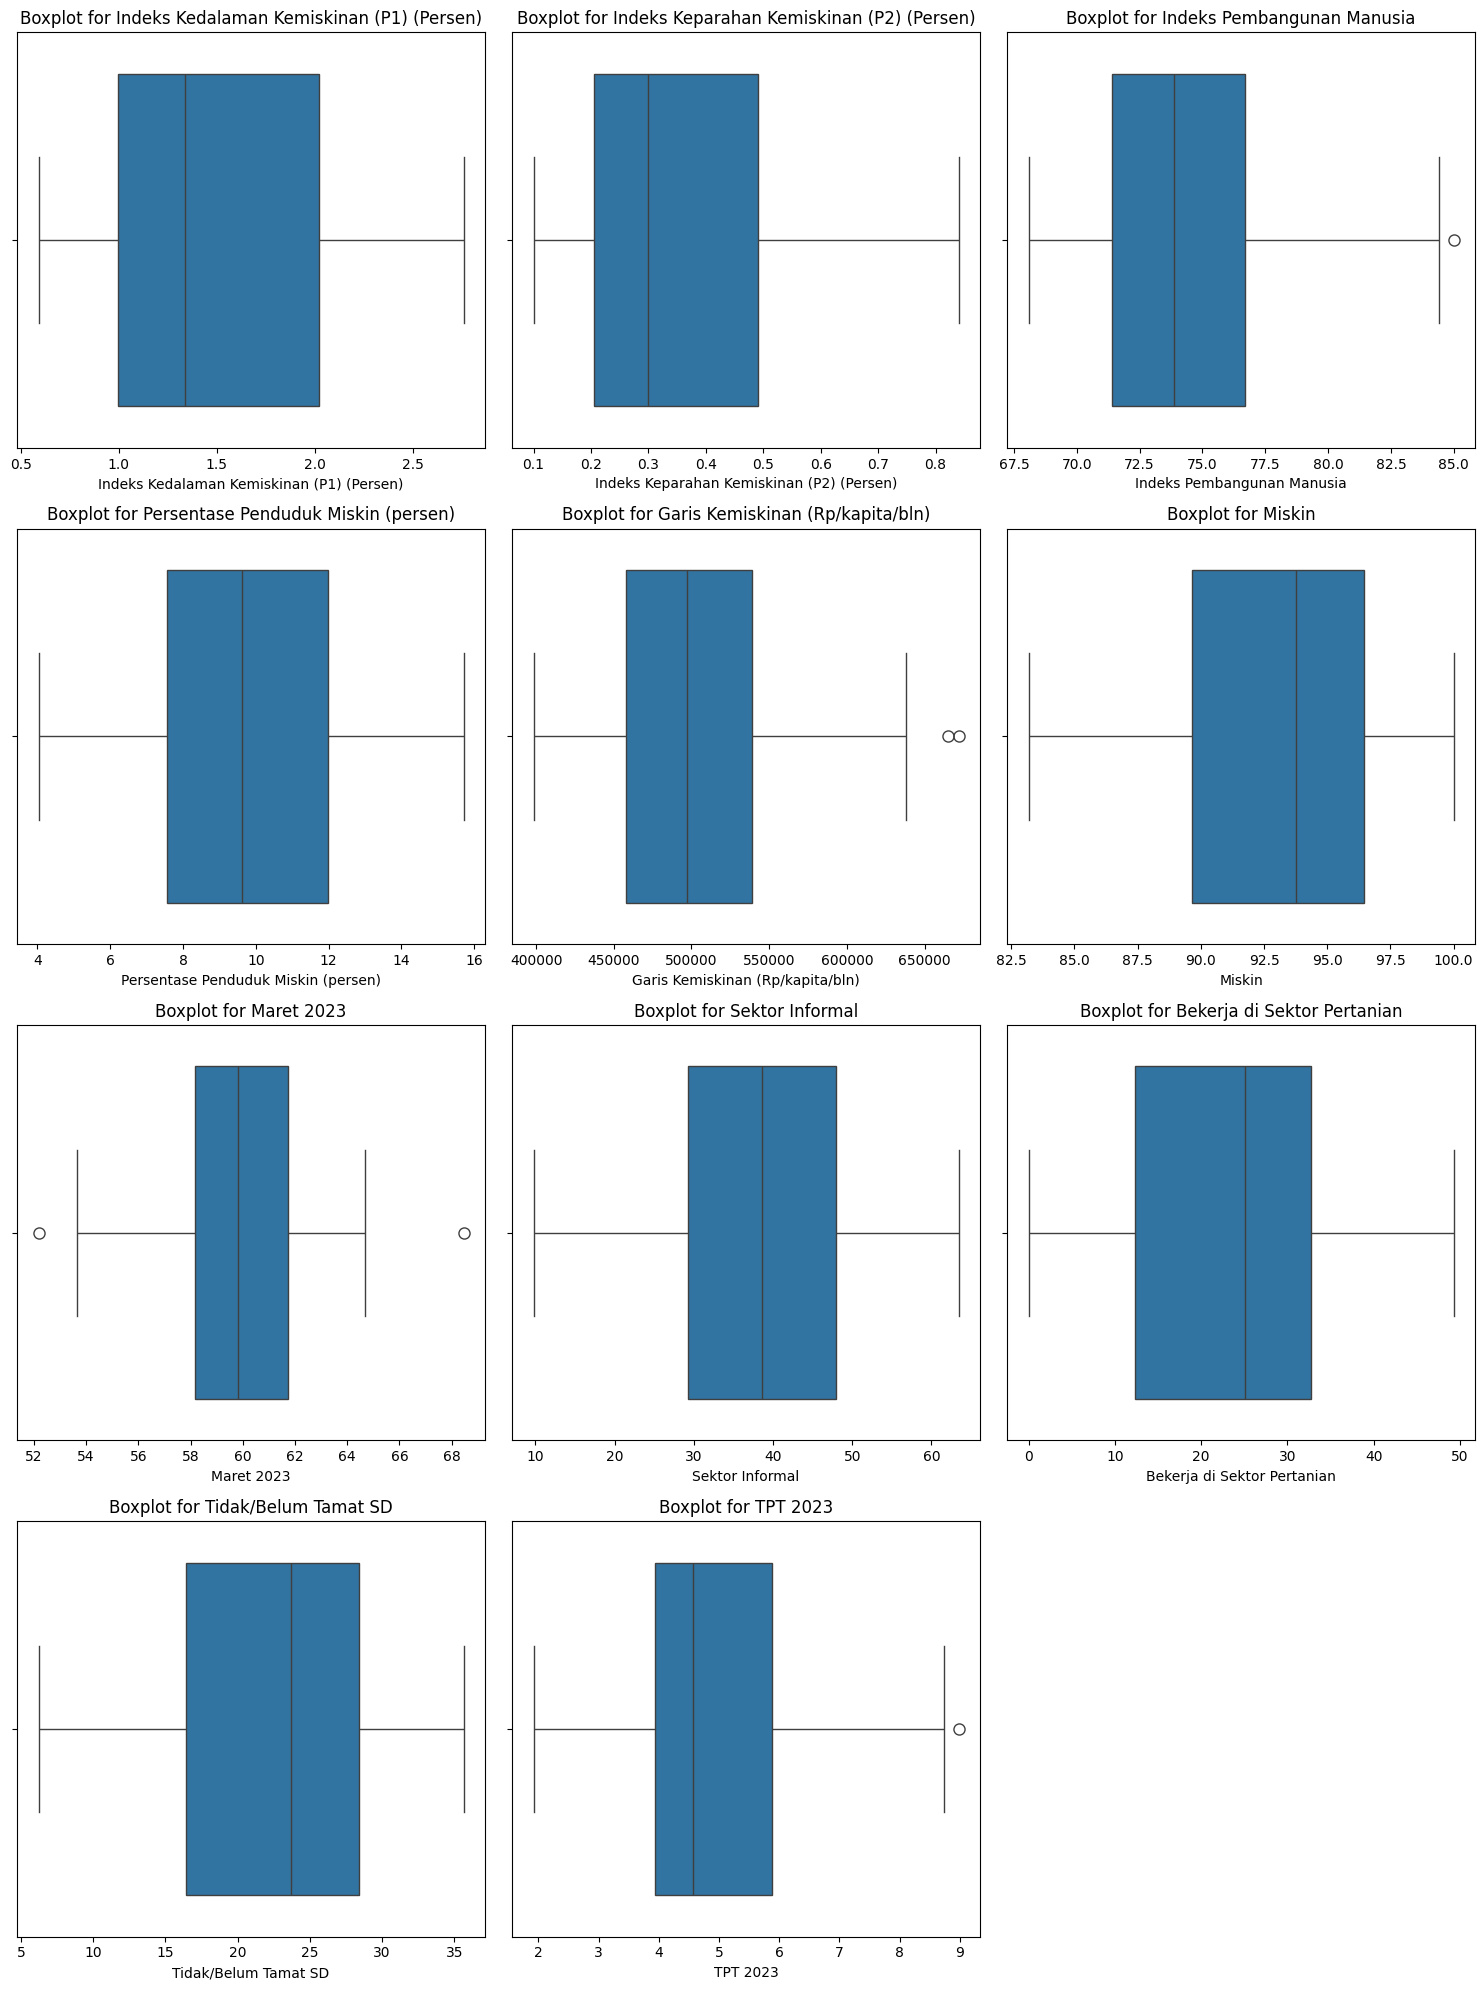

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Set the number of rows and columns for subplots
num_columns = len(data_miskin.select_dtypes(include='number').columns)
num_rows = (num_columns // 3) + (num_columns % 3 > 0)  # Adjust for the number of rows

# Create a figure for subplots
plt.figure(figsize=(15, 5 * num_rows))

# Loop through numerical columns and create a boxplot for each
for i, column in enumerate(data_miskin.select_dtypes(include='number').columns):
    plt.subplot(num_rows, 3, i + 1)  # Arrange boxplots in a grid
    sns.boxplot(x=data_miskin[column],
                flierprops=dict(marker='o', color='red', markersize=8))  # Customization for outliers
    plt.title(f'Boxplot for {column}')

plt.tight_layout()  # Adjust subplots to fit into the figure area
plt.show()


## Pengecekkan data outlier dengan boxplot

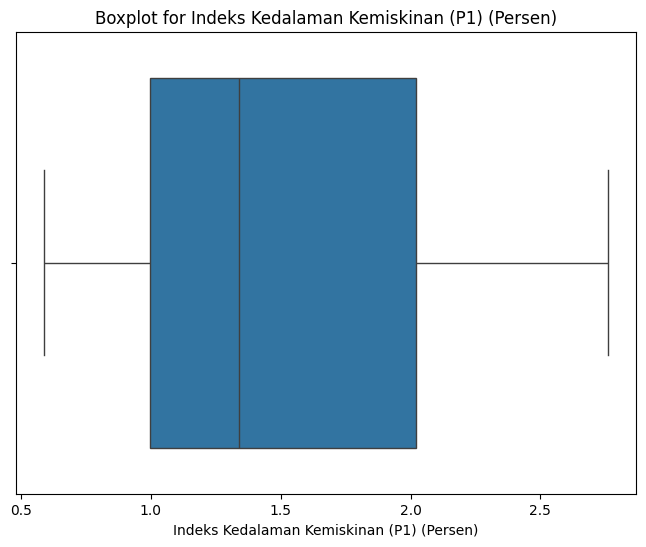

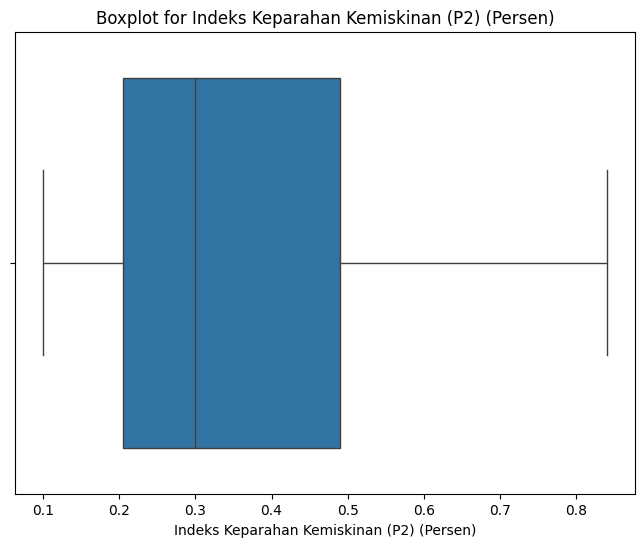

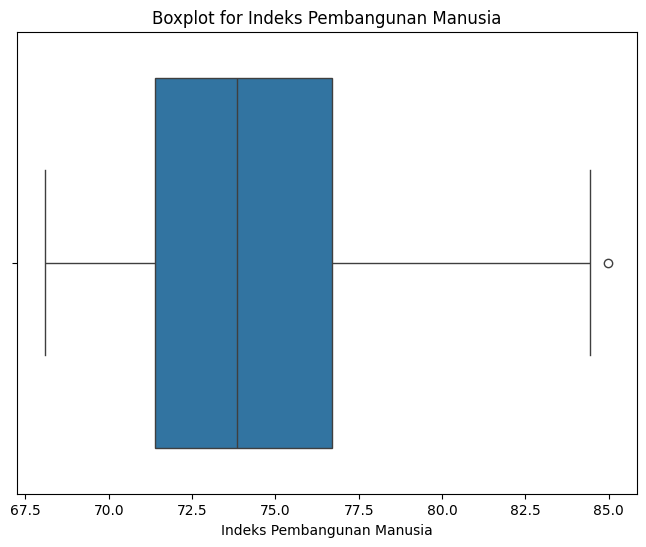

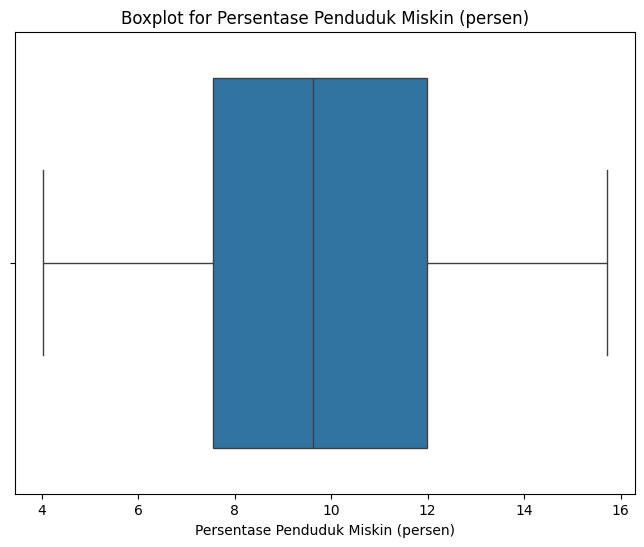

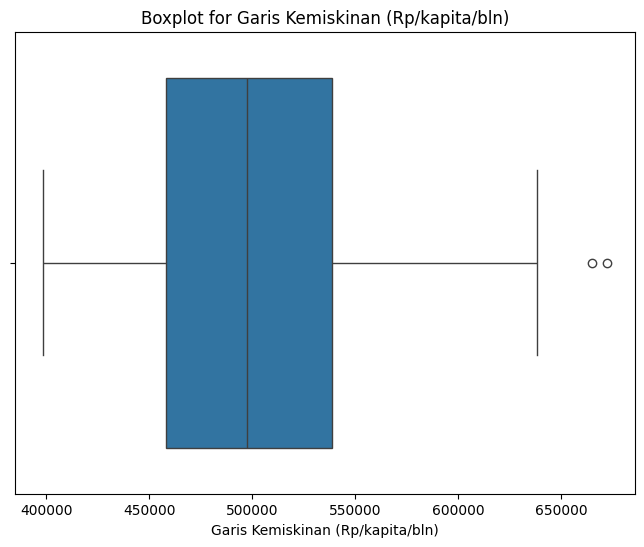

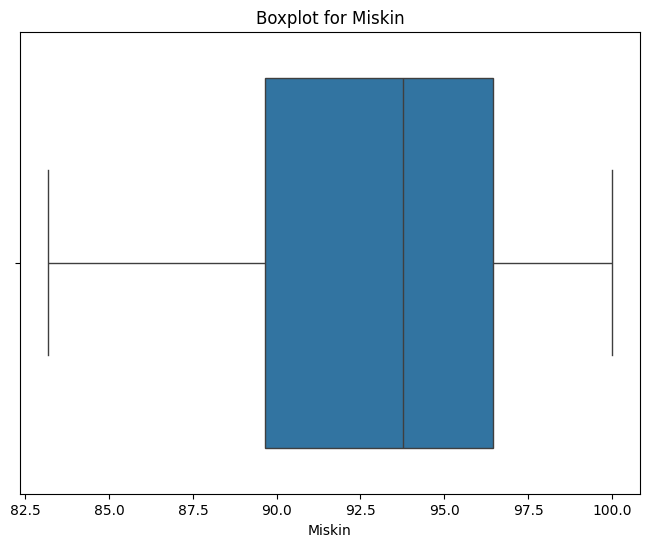

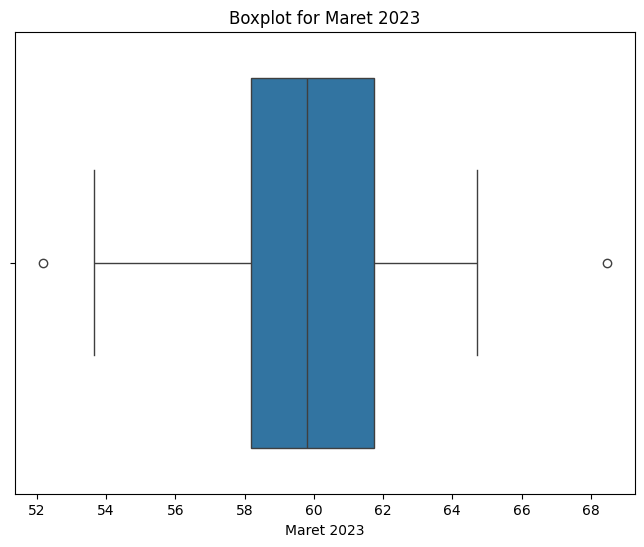

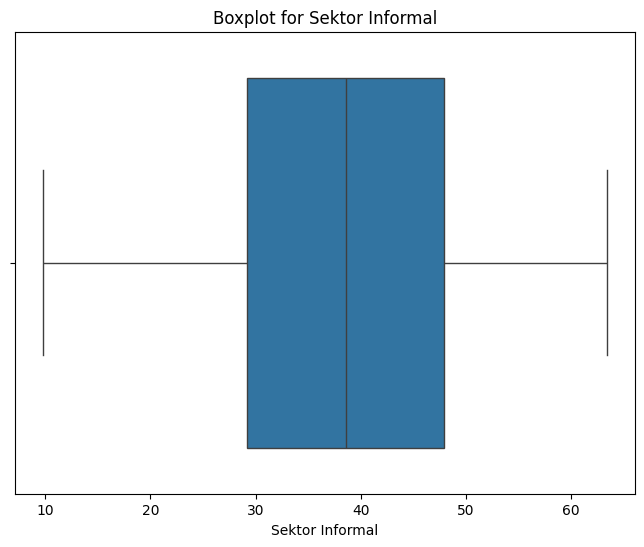

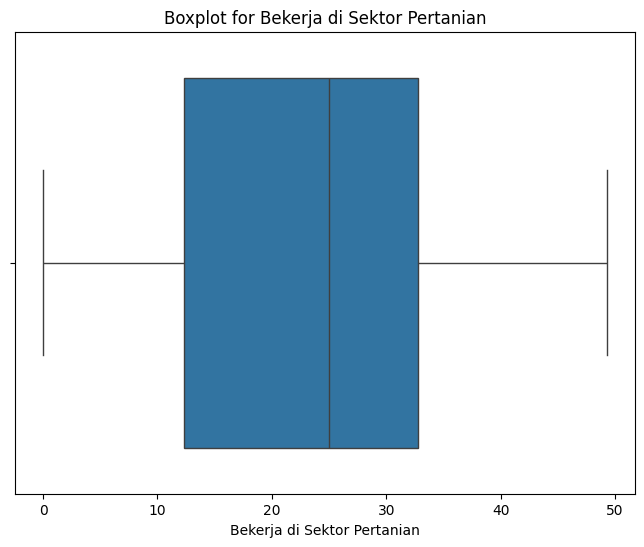

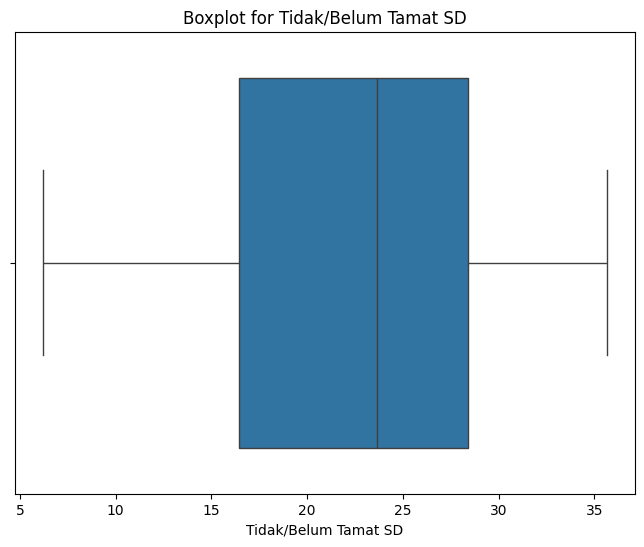

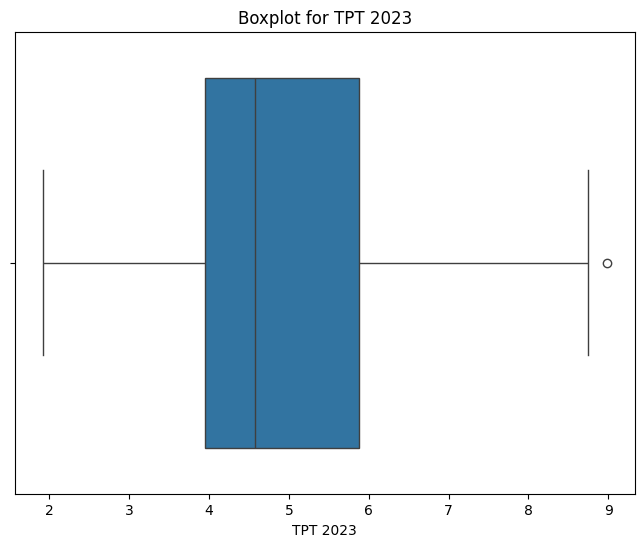

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Loop through columns and create boxplots for numerical columns
for column in data_miskin.columns:
  if pd.api.types.is_numeric_dtype(data_miskin[column]):
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=data_miskin[column])
    plt.title(f'Boxplot for {column}')
    plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

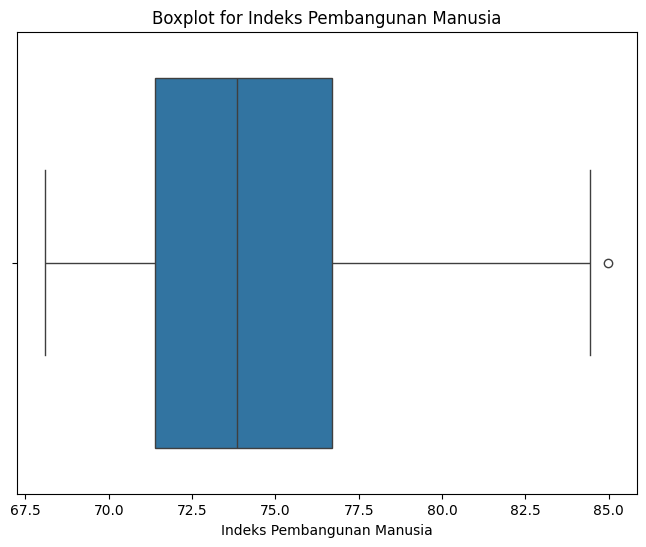

In [ ]:
# Boxplot untuk variabel 'Indeks Keparahan Kemiskinan'
plt.figure(figsize=(8, 6))
sns.boxplot(x=data_miskin['Indeks Pembangunan Manusia'])
plt.title('Boxplot for Indeks Pembangunan Manusia')
plt.show()

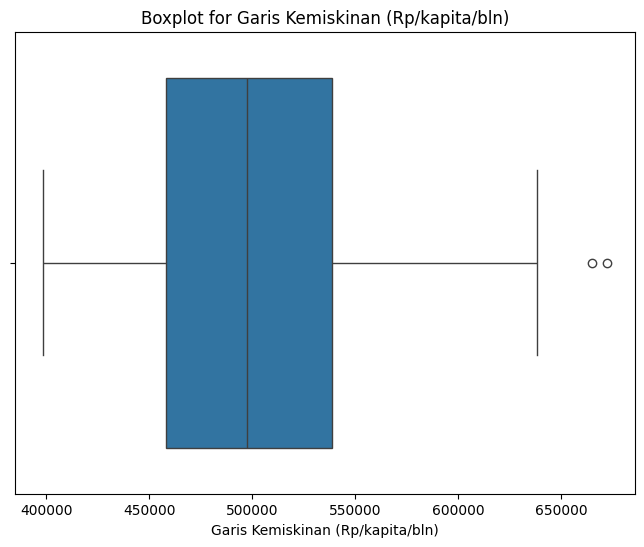

In [ ]:
# Boxplot untuk variabel 'Indeks Keparahan Kemiskinan'
plt.figure(figsize=(8, 6))
sns.boxplot(x=data_miskin['Garis Kemiskinan (Rp/kapita/bln)'])
plt.title('Boxplot for Garis Kemiskinan (Rp/kapita/bln)')
plt.show()

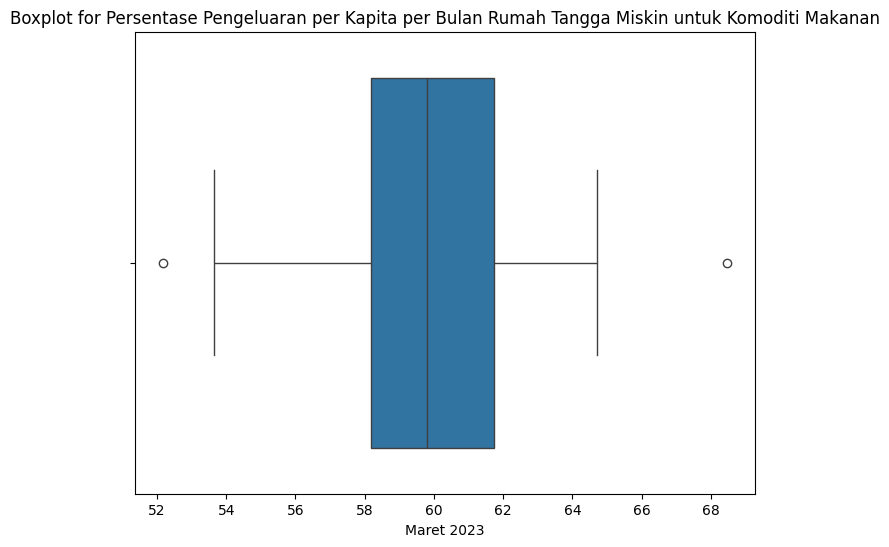

In [ ]:
# Boxplot untuk variabel 'Indeks Keparahan Kemiskinan'
plt.figure(figsize=(8, 6))
sns.boxplot(x=data_miskin['Maret 2023'])
plt.title('Boxplot for Persentase Pengeluaran per Kapita per Bulan Rumah Tangga Miskin untuk Komoditi Makanan')
plt.show()

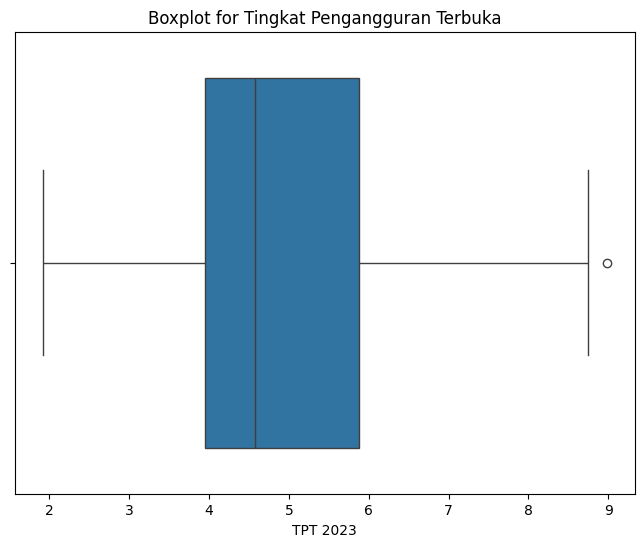

In [ ]:
# Boxplot untuk variabel 'Indeks Keparahan Kemiskinan'
plt.figure(figsize=(8, 6))
sns.boxplot(x=data_miskin['TPT 2023'])
plt.title('Boxplot for Tingkat Pengangguran Terbuka')
plt.show()

In [ ]:
data_miskin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 12 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Kabupaten/Kota                             35 non-null     object 
 1   Indeks Kedalaman Kemiskinan (P1) (Persen)  35 non-null     float64
 2   Indeks Keparahan Kemiskinan (P2) (Persen)  35 non-null     float64
 3   Indeks Pembangunan Manusia                 35 non-null     float64
 4   Persentase Penduduk Miskin (persen)        35 non-null     float64
 5   Garis Kemiskinan (Rp/kapita/bln)           35 non-null     int64  
 6   Miskin                                     35 non-null     float64
 7   Maret 2023                                 35 non-null     float64
 8   Sektor Informal                            35 non-null     float64
 9   Bekerja di Sektor Pertanian                35 non-null     float64
 10  Tidak/Belum Tamat SD        

# EDA

## Melihat distribusi data

In [ ]:
data_miskin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 12 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Kabupaten/Kota                             35 non-null     object 
 1   Indeks Kedalaman Kemiskinan (P1) (Persen)  35 non-null     float64
 2   Indeks Keparahan Kemiskinan (P2) (Persen)  35 non-null     float64
 3   Indeks Pembangunan Manusia                 35 non-null     float64
 4   Persentase Penduduk Miskin (persen)        35 non-null     float64
 5   Garis Kemiskinan (Rp/kapita/bln)           35 non-null     int64  
 6   Miskin                                     35 non-null     float64
 7   Maret 2023                                 35 non-null     float64
 8   Sektor Informal                            35 non-null     float64
 9   Bekerja di Sektor Pertanian                35 non-null     float64
 10  Tidak/Belum Tamat SD        

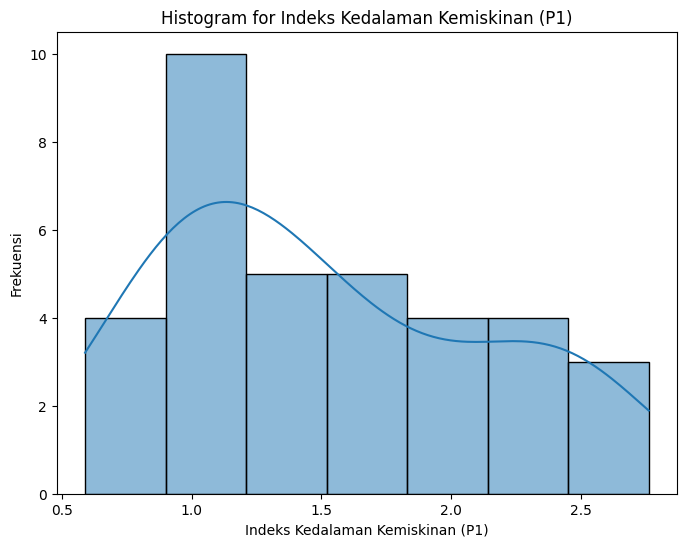

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(data_miskin['Indeks Kedalaman Kemiskinan (P1) (Persen)'], kde=True)
plt.title('Histogram for Indeks Kedalaman Kemiskinan (P1)')
plt.xlabel('Indeks Kedalaman Kemiskinan (P1)')
plt.ylabel('Frekuensi')
plt.show()


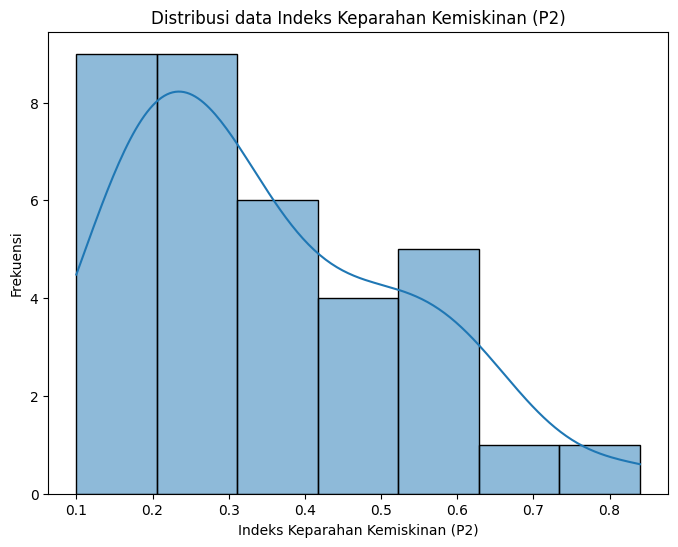

In [ ]:
plt.figure(figsize=(8,6))
sns.histplot(data_miskin['Indeks Keparahan Kemiskinan (P2) (Persen)'], kde=True)
plt.title('Distribusi data Indeks Keparahan Kemiskinan (P2)')
plt.xlabel('Indeks Keparahan Kemiskinan (P2)')
plt.ylabel('Frekuensi')
plt.show()

Text(0, 0.5, 'Frekuensi')

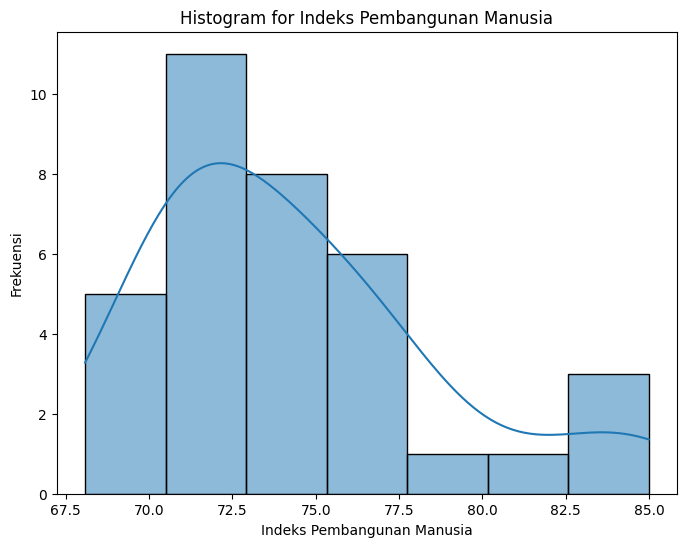

In [ ]:
plt.figure(figsize=(8,6))
sns.histplot(data_miskin['Indeks Pembangunan Manusia'], kde=True)
plt.title('Histogram for Indeks Pembangunan Manusia')
plt.xlabel('Indeks Pembangunan Manusia')
plt.ylabel('Frekuensi')

Text(0, 0.5, 'Frekuensi')

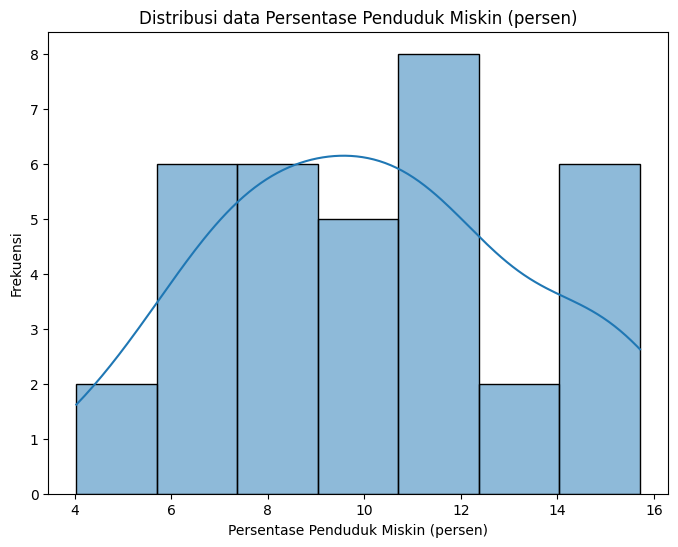

In [ ]:
plt.figure(figsize=(8,6))
sns.histplot(data_miskin['Persentase Penduduk Miskin (persen)'], kde=True)
plt.title('Distribusi data Persentase Penduduk Miskin (persen)')
plt.xlabel('Persentase Penduduk Miskin (persen)')
plt.ylabel('Frekuensi')

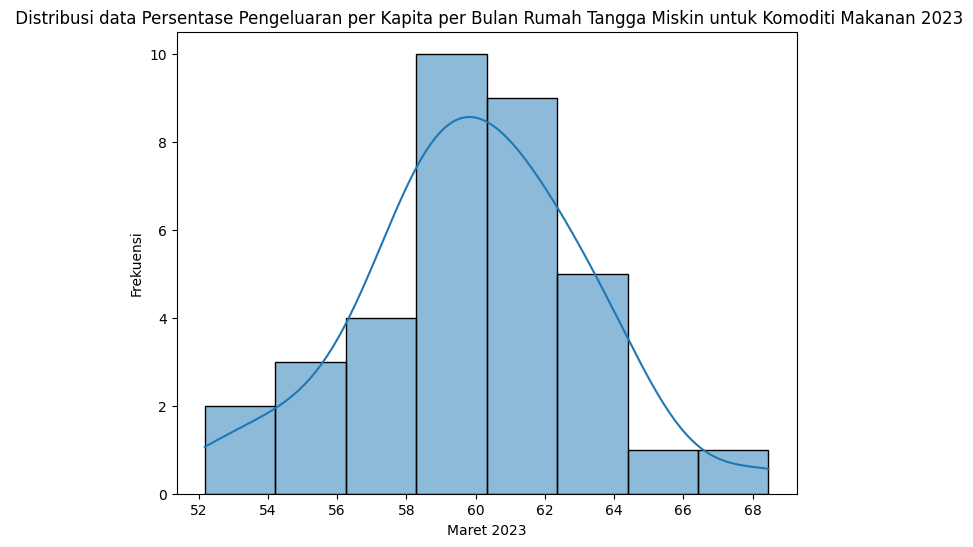

In [ ]:
plt.figure(figsize=(8,6))
sns.histplot(data_miskin['Maret 2023'], kde=True)
plt.title(' Distribusi data Persentase Pengeluaran per Kapita per Bulan Rumah Tangga Miskin untuk Komoditi Makanan 2023')
plt.xlabel('Maret 2023')
plt.ylabel('Frekuensi')
plt.show()

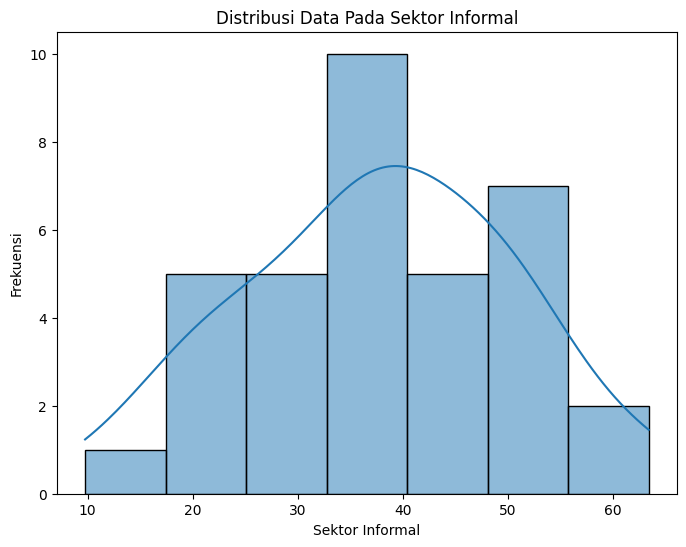

In [ ]:
plt.figure(figsize=(8,6))
sns.histplot(data_miskin['Sektor Informal'], kde=True)
plt.title('Distribusi Data Pada Sektor Informal')
plt.xlabel('Sektor Informal')
plt.ylabel('Frekuensi')
plt.show()

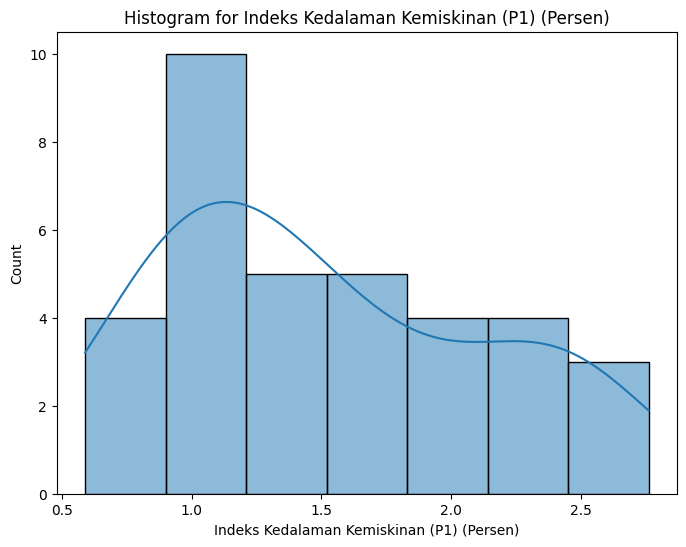

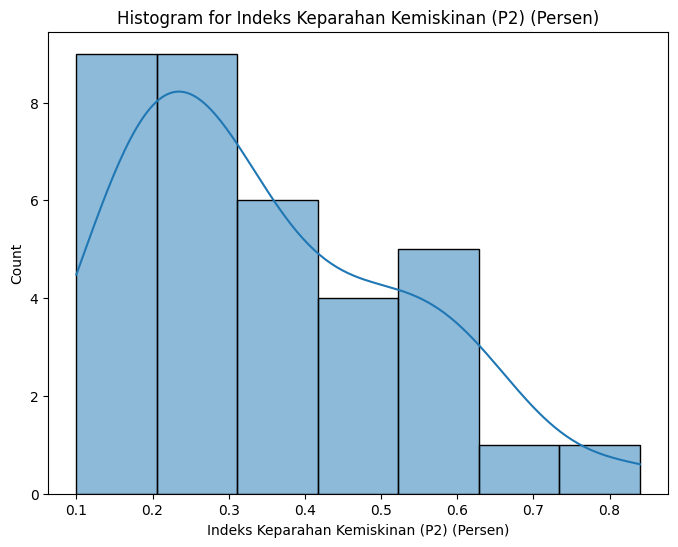

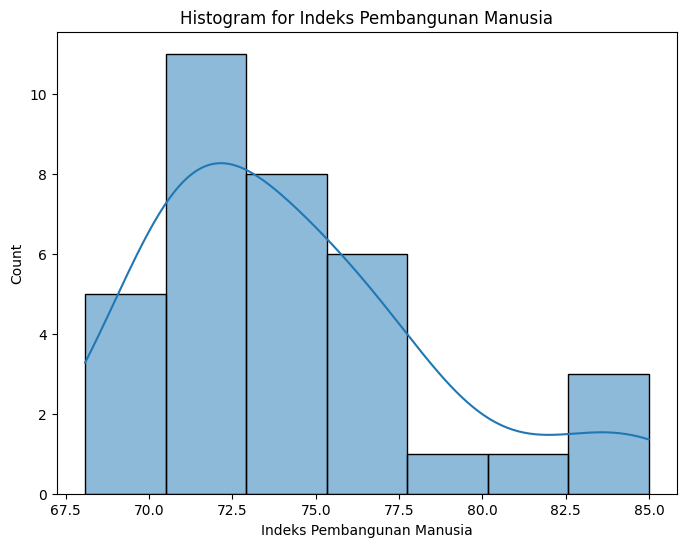

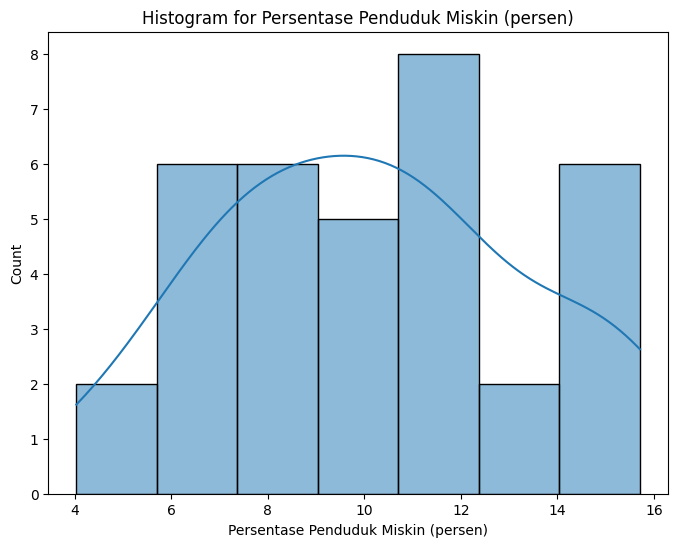

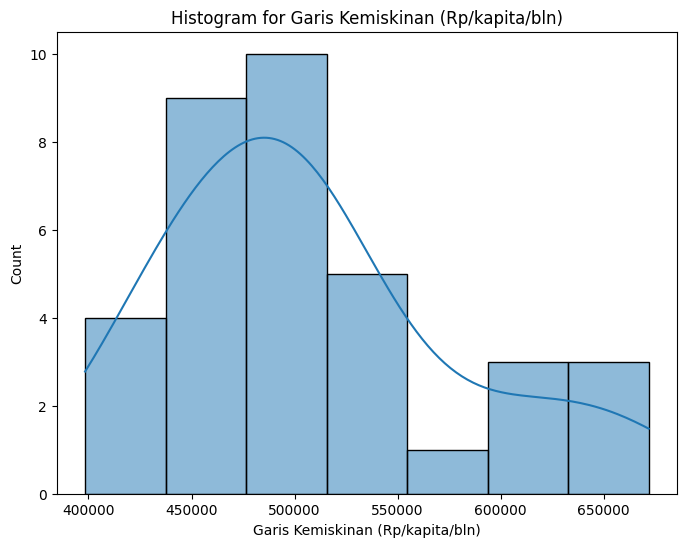

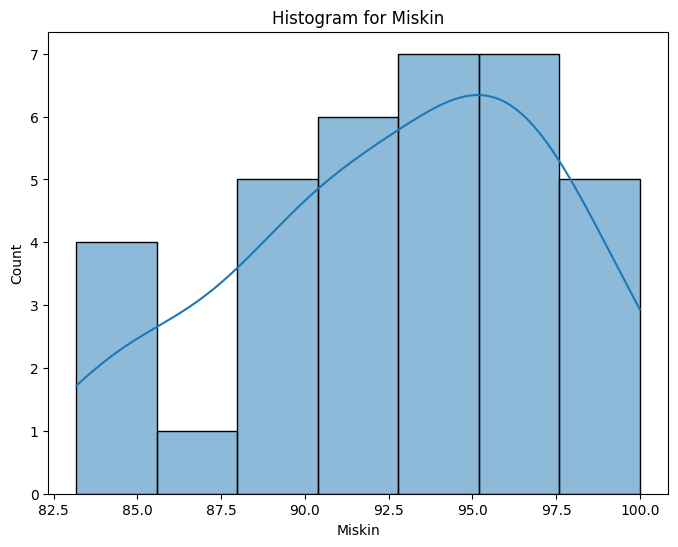

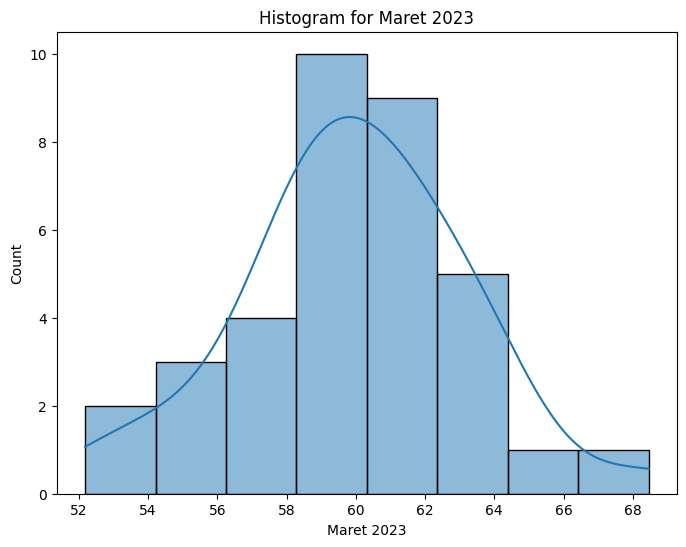

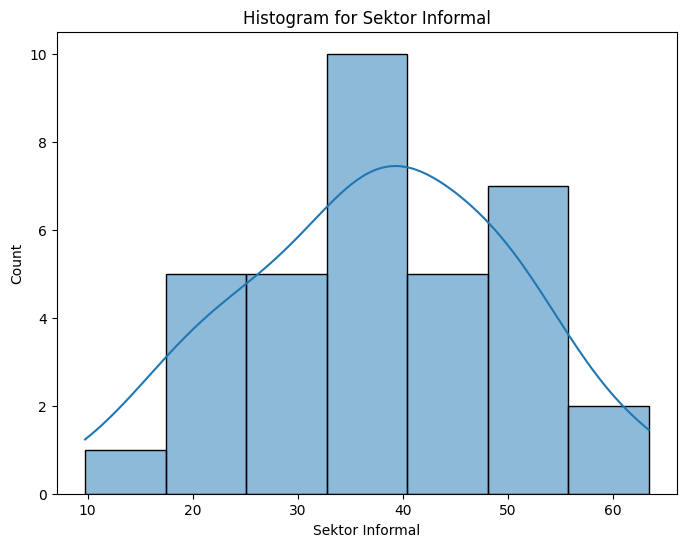

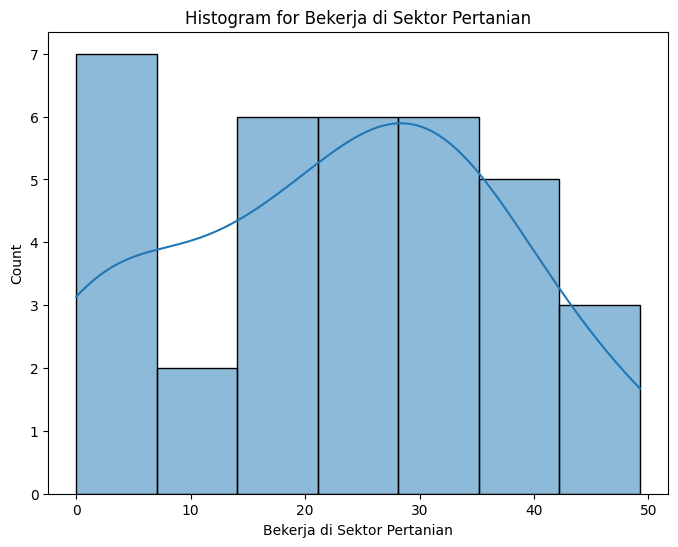

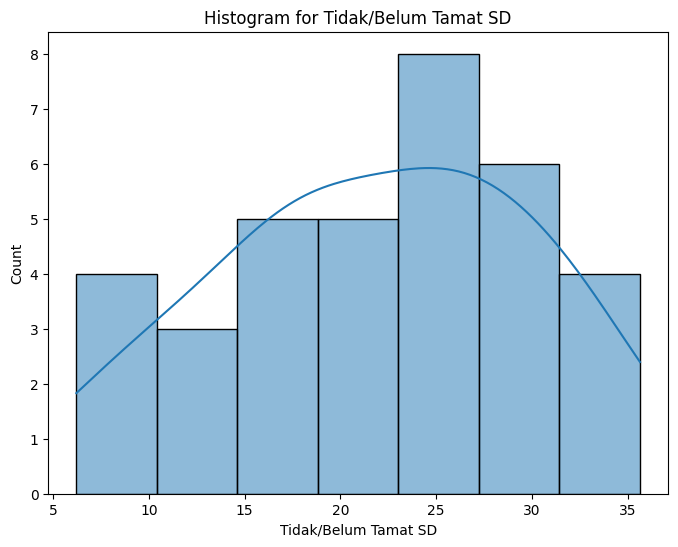

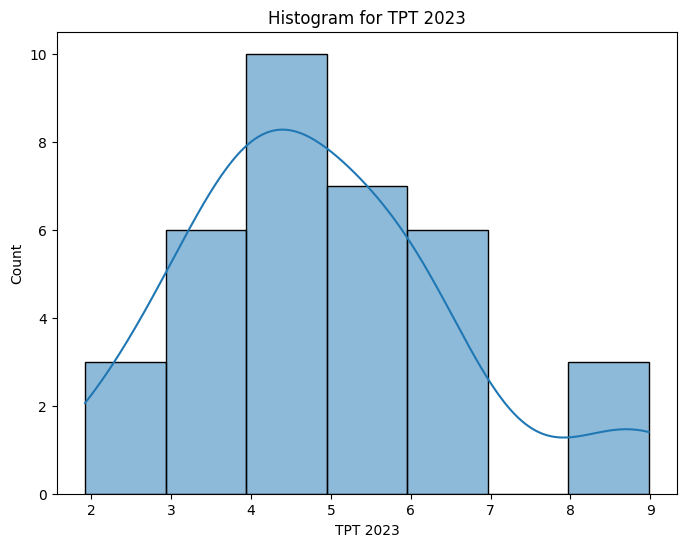

In [ ]:
#distribusi data
for column in data_miskin.columns:
  if pd.api.types.is_numeric_dtype(data_miskin[column]):
    plt.figure(figsize=(8, 6))
    sns.histplot(data_miskin[column], kde=True)
    plt.title(f'Histogram for {column}')
    plt.show()

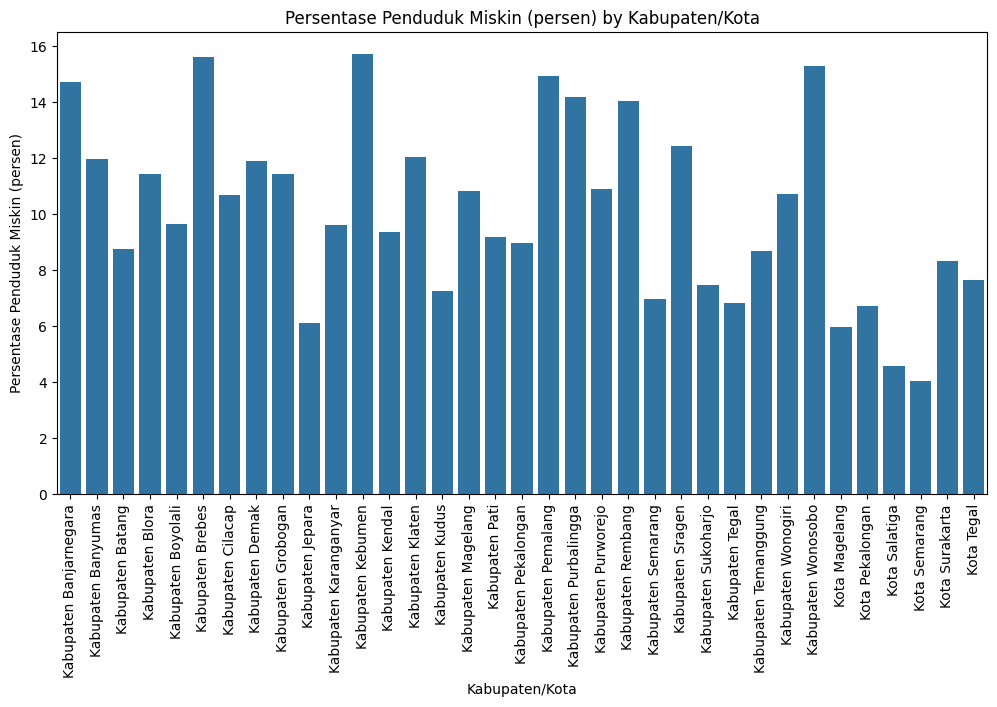

In [ ]:
#'Kabupaten/Kota' vs. 'Persentase Penduduk Miskin (persen)'
plt.figure(figsize=(12, 6))
sns.barplot(x='Kabupaten/Kota', y='Persentase Penduduk Miskin (persen)', data=data_miskin)
plt.title('Persentase Penduduk Miskin (persen) by Kabupaten/Kota')
plt.xlabel('Kabupaten/Kota')
plt.ylabel('Persentase Penduduk Miskin (persen)')
plt.xticks(rotation=90)
plt.show()

<ipython-input-50-fbe920dfaab0>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data_miskin, x='Kabupaten/Kota', y='Tidak/Belum Tamat SD', palette='viridis')


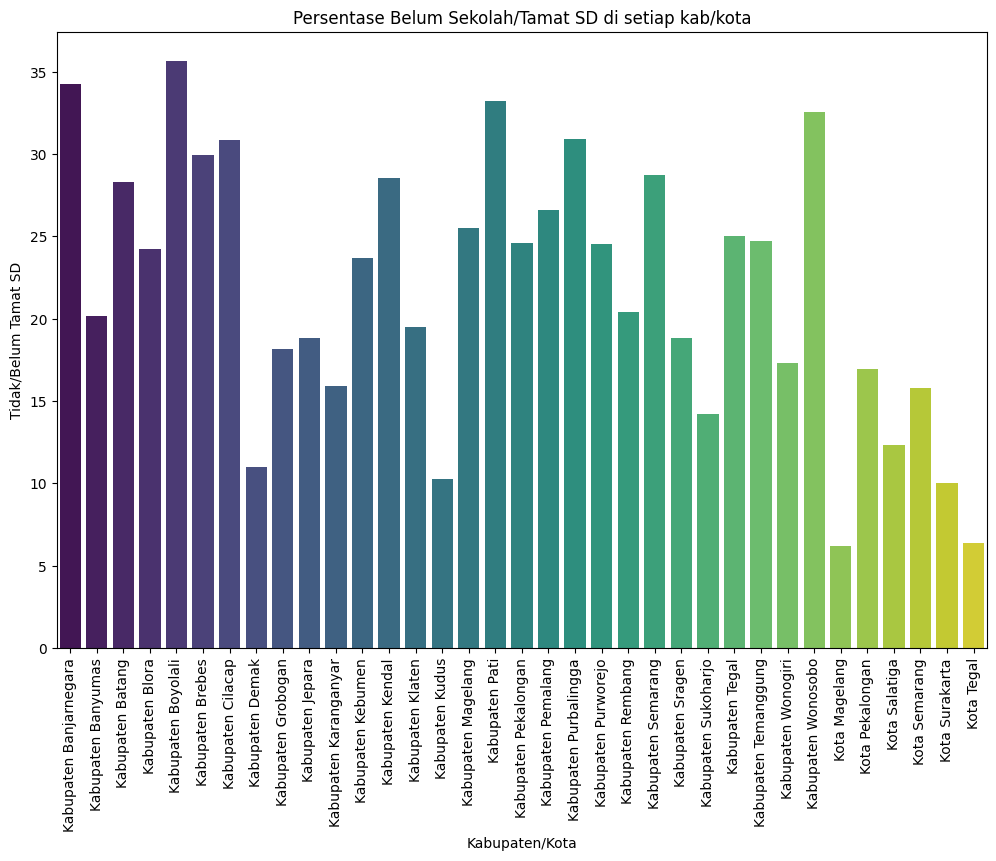

In [ ]:
plt.figure(figsize=(12, 8))
sns.barplot(data=data_miskin, x='Kabupaten/Kota', y='Tidak/Belum Tamat SD', palette='viridis')
plt.title('Persentase Belum Sekolah/Tamat SD di setiap kab/kota')
plt.xlabel('Kabupaten/Kota')
plt.ylabel('Tidak/Belum Tamat SD')
plt.xticks(rotation=90)
plt.show()


<ipython-input-51-f0b258425ff6>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Kabupaten/Kota', y='TPT 2023',palette='viridis', data=data_miskin)


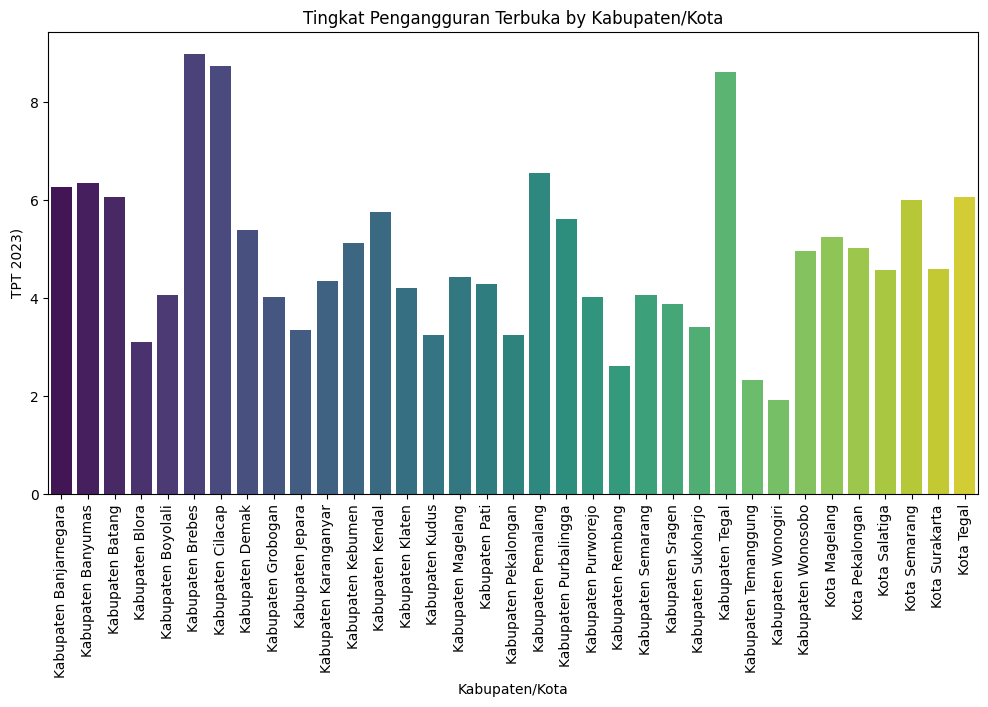

In [ ]:
#'Kabupaten/Kota' vs. 'Persentase Penduduk Miskin (persen)'
plt.figure(figsize=(12, 6))
sns.barplot(x='Kabupaten/Kota', y='TPT 2023',palette='viridis', data=data_miskin)
plt.title('Tingkat Pengangguran Terbuka by Kabupaten/Kota')
plt.xlabel('Kabupaten/Kota')
plt.ylabel('TPT 2023)')
plt.xticks(rotation=90)
plt.show()

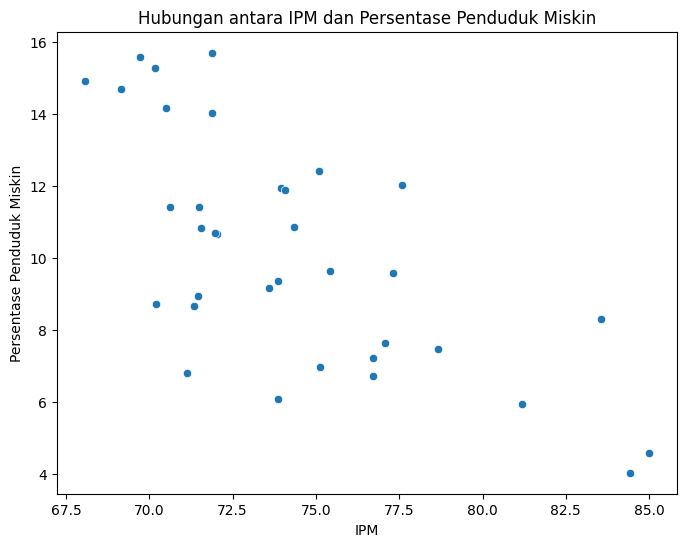

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Indeks Pembangunan Manusia', y='Persentase Penduduk Miskin (persen)', data=data_miskin)
plt.title('Hubungan antara IPM dan Persentase Penduduk Miskin')
plt.xlabel('IPM')
plt.ylabel('Persentase Penduduk Miskin')
plt.show()


In [ ]:
data_miskin.describe()

,Indeks Kedalaman Kemiskinan (P1) (Persen),Indeks Keparahan Kemiskinan (P2) (Persen),Indeks Pembangunan Manusia,Persentase Penduduk Miskin (persen),Garis Kemiskinan (Rp/kapita/bln),Miskin,Maret 2023,Sektor Informal,Bekerja di Sektor Pertanian,Tidak/Belum Tamat SD,TPT 2023
count,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000
mean,1.508571,0.347429,74.305143,10.128571,507425.571429,92.806857,59.949143,37.712286,22.646571,21.830571,4.864857
std,0.625051,0.182650,4.282637,3.211398,70659.121881,4.701589,3.279635,12.746140,14.453343,8.066476,1.689522
min,0.590000,0.100000,68.080000,4.030000,398344.000000,83.180000,52.180000,9.770000,0.000000,6.210000,1.920000
25%,0.995000,0.205000,71.390000,7.555000,457802.000000,89.665000,58.185000,29.220000,12.325000,16.435000,3.945000
50%,1.340000,0.300000,73.850000,9.630000,497315.000000,93.770000,59.810000,38.580000,25.040000,23.660000,4.570000
75%,2.020000,0.490000,76.710000,11.995000,538814.500000,96.450000,61.740000,47.930000,32.765000,28.425000,5.875000
max,2.760000,0.840000,84.990000,15.710000,671936.000000,100.000000,68.460000,63.430000,49.270000,35.650000,8.980000


##Kolerasi Antar Feature

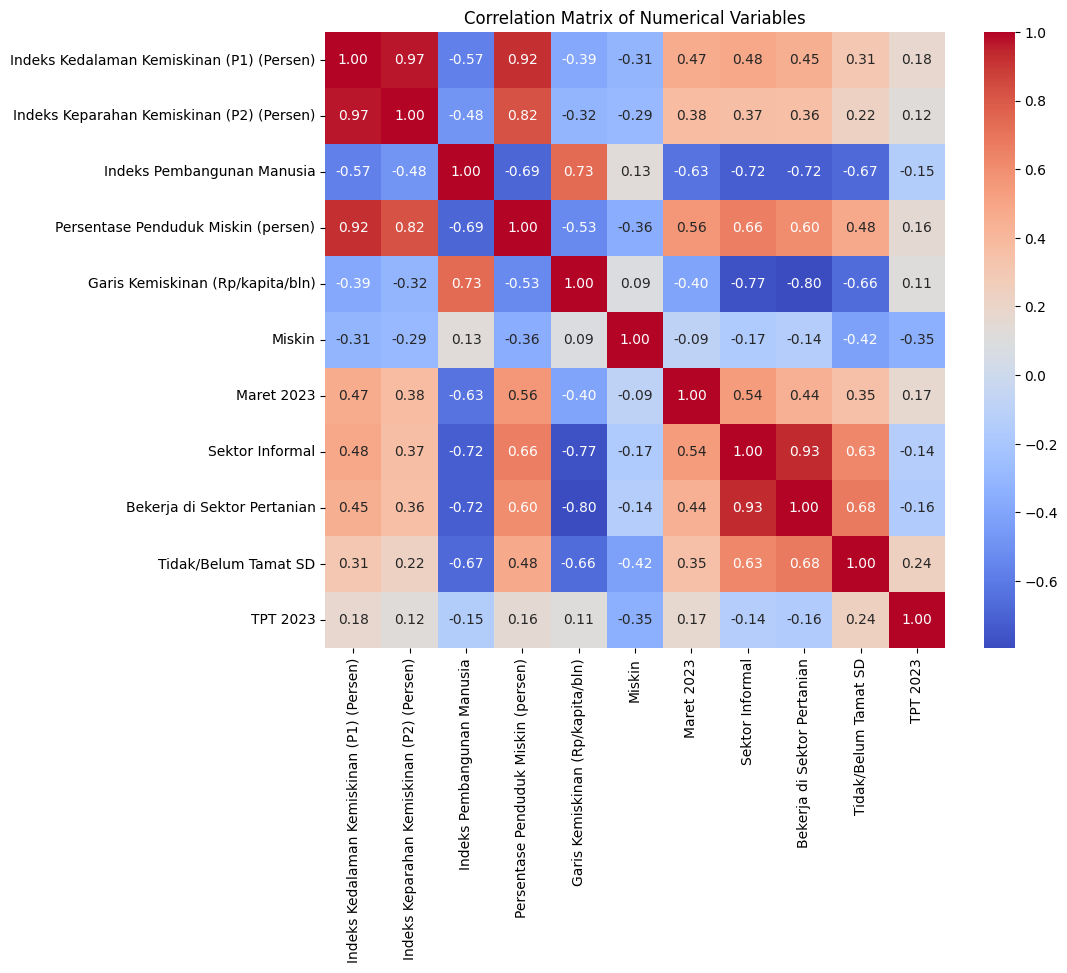

In [ ]:
# Descriptive statistics for numerical columns
numerical_data = data_miskin.select_dtypes(include=np.number)
# Correlation matrix for numerical variables
correlation_matrix = numerical_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

# Elbow Method

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [ ]:
# Pilih kolom numerik untuk clustering
features = data_miskin.select_dtypes(include=np.number)

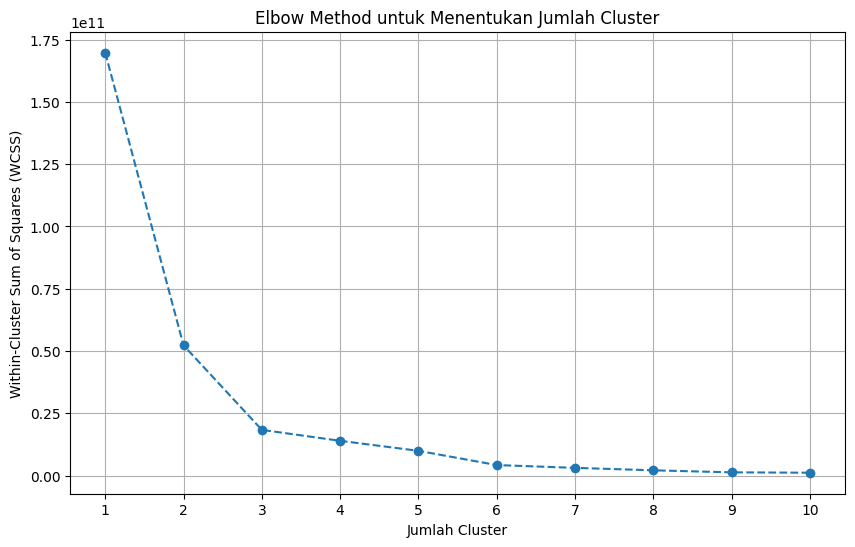

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
# Mencari jumlah cluster optimal menggunakan Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(features)
    wcss.append(kmeans.inertia_)

# Plot Elbow Method
plt.figure(figsize=(10,6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method untuk Menentukan Jumlah Cluster')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

# Modeling

### Percobaan K Means

In [ ]:
data_miskin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 12 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Kabupaten/Kota                             35 non-null     object 
 1   Indeks Kedalaman Kemiskinan (P1) (Persen)  35 non-null     float64
 2   Indeks Keparahan Kemiskinan (P2) (Persen)  35 non-null     float64
 3   Indeks Pembangunan Manusia                 35 non-null     float64
 4   Persentase Penduduk Miskin (persen)        35 non-null     float64
 5   Garis Kemiskinan (Rp/kapita/bln)           35 non-null     int64  
 6   Miskin                                     35 non-null     float64
 7   Maret 2023                                 35 non-null     float64
 8   Sektor Informal                            35 non-null     float64
 9   Bekerja di Sektor Pertanian                35 non-null     float64
 10  Tidak/Belum Tamat SD        

In [ ]:
# Step 2: Select relevant features for clustering
data_feature= ['Kabupaten/Kota','Indeks Kedalaman Kemiskinan (P1) (Persen)',
            'Indeks Keparahan Kemiskinan (P2) (Persen)',
            'Indeks Pembangunan Manusia',
            'Persentase Penduduk Miskin (persen)','Sektor Informal']

In [ ]:
data_feature = data_miskin[data_feature]

In [ ]:
# Pilih kolom numerik untuk clustering
Selection_data = data_feature.select_dtypes(include=np.number)

In [ ]:
# Menormalisasikan data menggunakan Minmaxscaler
from sklearn.preprocessing import StandardScaler,MinMaxScaler
scaler = MinMaxScaler()
data_normalized = scaler.fit_transform(Selection_data)

In [ ]:
data_kmeans= data_miskin.copy()
# Pilih kolom numerik untuk clustering
features = data_kmeans.select_dtypes(include=np.number)
features.head()

,Indeks Kedalaman Kemiskinan (P1) (Persen),Indeks Keparahan Kemiskinan (P2) (Persen),Indeks Pembangunan Manusia,Persentase Penduduk Miskin (persen),Garis Kemiskinan (Rp/kapita/bln),Miskin,Maret 2023,Sektor Informal,Bekerja di Sektor Pertanian,Tidak/Belum Tamat SD,TPT 2023
0,2.38,0.61,69.16,14.71,398344,91.14,57.91,48.21,35.58,34.24,6.26
1,2.09,0.50,73.96,11.95,500861,91.63,58.75,37.80,14.91,20.16,6.35
2,1.25,0.27,70.20,8.73,412196,96.70,59.37,39.67,27.71,28.32,6.06
3,1.59,0.32,70.63,11.42,464959,94.59,60.89,60.50,49.27,24.23,3.10
4,1.56,0.40,75.41,9.63,442071,84.85,56.20,51.41,42.89,35.65,4.05


In [ ]:
# Pilih kolom numerik untuk clustering
features = data_kmeans.select_dtypes(include=np.number)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Inisialisasi centroid secara acak
def initialize_centroids(data, k):
    np.random.seed(42)  # Untuk memastikan hasil tetap
    indices = np.random.choice(len(data), k, replace=False)
    return data[indices]

# Fungsi untuk mengalokasikan data ke cluster terdekat
def assign_clusters(data, centroids):
    distances = pairwise_distances(data, centroids, metric='euclidean')
    return np.argmin(distances, axis=1)

# Fungsi untuk menghitung ulang centroid
def update_centroids(data, clusters, k):
    new_centroids = []
    for i in range(k):
        cluster_points = data[clusters == i]
        if len(cluster_points) > 0:
            new_centroids.append(np.mean(cluster_points, axis=0))
        else:
            new_centroids.append(np.zeros(data.shape[1]))
    return np.array(new_centroids)

# Fungsi untuk menghitung DBI dan Silhouette
def calculate_dbi_and_silhouette(data, clusters, centroids):
    k = len(centroids)

    # Intra-cluster distances (σ_i)
    intra_cluster_distances = []
    for i in range(k):
        cluster_points = data[clusters == i]
        if len(cluster_points) > 0:
            distances = np.linalg.norm(cluster_points - centroids[i], axis=1)
            intra_cluster_distances.append(np.mean(distances))
        else:
            intra_cluster_distances.append(0)

    # Inter-cluster distances (d_ij)
    inter_cluster_distances = pairwise_distances(centroids, metric='euclidean')

    # Davies-Bouldin Index (DBI)
    dbi = 0
    for i in range(k):
        max_ratio = 0
        for j in range(k):
            if i != j:
                ratio = (intra_cluster_distances[i] + intra_cluster_distances[j]) / inter_cluster_distances[i, j]
                max_ratio = max(max_ratio, ratio)
        dbi += max_ratio
    dbi /= k

    # Silhouette Score
    silhouette_scores = []
    for idx, point in enumerate(data):
        cluster = clusters[idx]
        # Calculate a(i): average distance to other points in the same cluster
        same_cluster_points = data[clusters == cluster]
        a_i = np.mean(np.linalg.norm(same_cluster_points - point, axis=1))

        # Calculate b(i): minimum average distance to points in other clusters
        b_i = np.inf
        for other_cluster in range(k):
            if other_cluster != cluster:
                other_cluster_points = data[clusters == other_cluster]
                dist = np.mean(np.linalg.norm(other_cluster_points - point, axis=1))
                b_i = min(b_i, dist)

        # Calculate silhouette score for the point
        silhouette_score = (b_i - a_i) / max(a_i, b_i)
        silhouette_scores.append(silhouette_score)

    silhouette_avg = np.mean(silhouette_scores)

    return dbi, silhouette_avg

# Algoritma K-Means
def kmeans(data, k, max_iterations=100):
    centroids = initialize_centroids(data, k)
    for _ in range(max_iterations):
        clusters = assign_clusters(data, centroids)
        new_centroids = update_centroids(data, clusters, k)
        if np.allclose(centroids, new_centroids):
            break
        centroids = new_centroids
    return centroids, clusters


# Main program
if __name__ == "__main__":
    try:
        # Pastikan data_miskin sudah berupa DataFrame
        if isinstance(Selection_data, pd.DataFrame):
            data_array = Selection_data.to_numpy()  # Konversi DataFrame ke NumPy array
        else:
            raise ValueError("data_miskin harus berupa DataFrame.")

        # Jumlah cluster
        k = 3

        # Jalankan K-Means
        #centroids, clusters = kmeans(data_array, k)
         #Membuat dan menyesuaikan model K-Means
        kmeans = KMeans(n_clusters=k, random_state=42)
        clusters = kmeans.fit_predict(data_array)

        # Mendapatkan centroid dari model KMeans
        centroids = kmeans.cluster_centers_

        # Hitung evaluasi DBI dan Silhouette
        dbi, silhouette_avg = calculate_dbi_and_silhouette(data_array, clusters, centroids)

        # Menampilkan hasil
        print("Centroid Akhir:")
        print(centroids)
        print("\nCluster Data:")
        print(clusters)
        print("\nDavies-Bouldin Index (DBI):")
        print(dbi)
        print("\nSilhouette Score (Rata-rata):")
        print(silhouette_avg)
    except Exception as e:
        print(f"Error: {e}")

Centroid Akhir:
[[ 0.98181818  0.21181818 78.71090909  6.98545455 22.69      ]
 [ 1.77272727  0.39181818 71.60636364 12.26       52.13      ]
 [ 1.73076923  0.42461538 72.86076923 10.98461538 38.22384615]]

Cluster Data:
[1 2 2 1 1 1 2 2 1 0 2 1 2 0 0 1 2 2 2 2 1 2 2 2 0 0 1 1 1 0 0 0 0 0 0]

Davies-Bouldin Index (DBI):
0.6555819889124149

Silhouette Score (Rata-rata):
0.5103488970901768


### Percobaan K means 1

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.preprocessing import MinMaxScaler

# Main program
if __name__ == "__main__":
    try:
        # Misalkan 'features' adalah DataFrame yang berisi data Anda
        # Jika belum dalam bentuk DataFrame, konversikan terlebih dahulu
        # features = pd.DataFrame(data_miskin)  # Contoh konversi jika data_miskin adalah array

        # Pastikan 'features' sudah berupa DataFrame
        if isinstance(features, pd.DataFrame):
            data_array =features.to_numpy()  # Konversi DataFrame ke NumPy array
        else:
            raise ValueError("data_miskin harus berupa DataFrame.")

        # Skala data menggunakan MinMaxScaler
        #scaler = MinMaxScaler()
        #data_scaled = scaler.fit_transform(data_array)

        # Jumlah cluster
        k = 3

        # Membuat dan menyesuaikan model K-Means
        kmeans = KMeans(n_clusters=k, random_state=42)
        clusters = kmeans.fit_predict(data_array)

        # Mendapatkan centroid dari model KMeans
        centroids = kmeans.cluster_centers_

        # Hitung Silhouette Score menggunakan scikit-learn
        silhouette_avg = silhouette_score(data_array, clusters)

        # Hitung Davies-Bouldin Index menggunakan scikit-learn
        dbi = davies_bouldin_score(data_array, clusters)

        # Menampilkan hasil
        print("Centroid Akhir")
        print(centroids)
        print("\nCluster Data:")
        print(clusters)
        print("\nDavies-Bouldin Index (DBI):")
        print(dbi)
        print("\nSilhouette Score (Rata-rata):")
        print(silhouette_avg)
    except Exception as e:
        print(f"Error: {e}")


In [ ]:
from sklearn.metrics import silhouette_score, davies_bouldin_score
# Hitung Silhouette Score menggunakan scikit-learn
silhouette_avg = silhouette_score(data_array, clusters)
# Hitung Davies-Bouldin Index menggunakan scikit-learn
dbi = davies_bouldin_score(data_array, clusters)
# Menampilkan hasil
print("Hasil Evaluasi Algoritma K-Means")
print("\nDavies-Bouldin Index (DBI):")
print(dbi)
print("\nSilhouette Score (Rata-rata):")
print(silhouette_avg)

Hasil Evaluasi Algoritma K-Means

Davies-Bouldin Index (DBI):
0.461241778893428

Silhouette Score (Rata-rata):
0.6202400272863365


Koefisien Silhouett= Nilai terbaik adalah 1 dan nilai terburuk adalah -1. Nilai mendekati 0 menunjukkan klaster yang tumpang tindih. Nilai negatif umumnya menunjukkan bahwa sampel telah ditetapkan ke klaster yang salah, karena klaster lain lebih mirip

 davies_bouldin_skor = Skor minimum adalah nol, nilai yang lebih rendah menunjukkan pengelompokan yang lebih baik.

### K-Means Data Aslinya

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.preprocessing import MinMaxScaler

# Main program
if __name__ == "__main__":
    try:
        # Misalkan 'features' adalah DataFrame yang berisi data Anda
        # Jika belum dalam bentuk DataFrame, konversikan terlebih dahulu
        # features = pd.DataFrame(data_miskin)  # Contoh konversi jika data_miskin adalah array

        # Pastikan 'features' sudah berupa DataFrame
        if isinstance(features, pd.DataFrame):
            data_array =features.to_numpy()  # Konversi DataFrame ke NumPy array
        else:
            raise ValueError("data_miskin harus berupa DataFrame.")

        # Skala data menggunakan MinMaxScaler
        #scaler = MinMaxScaler()
        #data_scaled = scaler.fit_transform(data_array)

        # Jumlah cluster
        k = 3

        # Membuat dan menyesuaikan model K-Means
        kmeans = KMeans(n_clusters=k, random_state=42)
        clusters = kmeans.fit_predict(data_array)

        # Mendapatkan centroid dari model KMeans
        centroids = kmeans.cluster_centers_

        # Hitung Silhouette Score menggunakan scikit-learn
        silhouette_avg = silhouette_score(data_array, clusters)

        # Hitung Davies-Bouldin Index menggunakan scikit-learn
        dbi = davies_bouldin_score(data_array, clusters)

        # Menampilkan hasil
        print("Centroid Akhir")
        print(centroids)
        print("\nCluster Data:")
        print(clusters)
        print("\nDavies-Bouldin Index (DBI):")
        print(dbi)
        print("\nSilhouette Score (Rata-rata):")
        print(silhouette_avg)
    except Exception as e:
        print(f"Error: {e}")


Centroid Akhir
[[1.55687500e+00 3.67500000e-01 7.36537500e+01 1.02168750e+01
  5.12799250e+05 9.34018750e+01 6.00100000e+01 3.60168750e+01
  1.99181250e+01 2.15650000e+01 4.89875000e+00]
 [9.05000000e-01 1.93333333e-01 8.13166667e+01 6.20000000e+00
  6.33924167e+05 9.31450000e+01 5.67916667e+01 1.86700000e+01
  9.38333333e-01 1.12750000e+01 5.24333333e+00]
 [1.72769231e+00 3.93846154e-01 7.18707692e+01 1.18330769e+01
  4.42427846e+05 9.19184615e+01 6.13315385e+01 4.85876923e+01
  3.60238462e+01 2.70292308e+01 4.64846154e+00]]

Cluster Data:
[2 0 2 2 2 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 2 0 0 2 0 0 2 2 2 1 1 1 1 1 1]

Davies-Bouldin Index (DBI):
0.461241778893428

Silhouette Score (Rata-rata):
0.6202400272863365


In [ ]:
print("Data yang telah dikonversi ke numpy Array")
data_array

Data yang telah dikonversi ke numpy Array


array([[2.38000e+00, 6.10000e-01, 6.91600e+01, 1.47100e+01, 3.98344e+05,
        9.11400e+01, 5.79100e+01, 4.82100e+01, 3.55800e+01, 3.42400e+01,
        6.26000e+00],
       [2.09000e+00, 5.00000e-01, 7.39600e+01, 1.19500e+01, 5.00861e+05,
        9.16300e+01, 5.87500e+01, 3.78000e+01, 1.49100e+01, 2.01600e+01,
        6.35000e+00],
       [1.25000e+00, 2.70000e-01, 7.02000e+01, 8.73000e+00, 4.12196e+05,
        9.67000e+01, 5.93700e+01, 3.96700e+01, 2.77100e+01, 2.83200e+01,
        6.06000e+00],
       [1.59000e+00, 3.20000e-01, 7.06300e+01, 1.14200e+01, 4.64959e+05,
        9.45900e+01, 6.08900e+01, 6.05000e+01, 4.92700e+01, 2.42300e+01,
        3.10000e+00],
       [1.56000e+00, 4.00000e-01, 7.54100e+01, 9.63000e+00, 4.42071e+05,
        8.48500e+01, 5.62000e+01, 5.14100e+01, 4.28900e+01, 3.56500e+01,
        4.05000e+00],
       [2.50000e+00, 5.50000e-01, 6.97100e+01, 1.56000e+01, 5.42495e+05,
        8.42000e+01, 6.02800e+01, 4.74000e+01, 3.32500e+01, 2.99200e+01,
        8.9800

### Menggunakan Selection data

In [ ]:
# Step 2: Select relevant features for clustering
data_feature= ['Kabupaten/Kota','Indeks Kedalaman Kemiskinan (P1) (Persen)',
            'Indeks Keparahan Kemiskinan (P2) (Persen)',
            'Indeks Pembangunan Manusia',
            'Persentase Penduduk Miskin (persen)','Sektor Informal']

In [ ]:
data_feature = data_miskin[data_feature]

In [ ]:
# Pilih kolom numerik untuk clustering
Selection_data = data_feature.select_dtypes(include=np.number)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.preprocessing import MinMaxScaler

# Main program
if __name__ == "__main__":
    try:
        # Misalkan 'features' adalah DataFrame yang berisi data Anda
        # Jika belum dalam bentuk DataFrame, konversikan terlebih dahulu
        # features = pd.DataFrame(data_miskin)  # Contoh konversi jika data_miskin adalah array

        # Pastikan 'features' sudah berupa DataFrame
        if isinstance(Selection_data, pd.DataFrame):
            data_array1 =Selection_data.to_numpy()  # Konversi DataFrame ke NumPy array
        else:
            raise ValueError("data_miskin harus berupa DataFrame.")

        # Skala data menggunakan MinMaxScaler
        #scaler = MinMaxScaler()
        #data_scaled = scaler.fit_transform(data_array)

        # Jumlah cluster
        k = 3

        # Membuat dan menyesuaikan model K-Means
        kmeans = KMeans(n_clusters=k, random_state=42)
        clusters = kmeans.fit_predict(data_array1)

        # Mendapatkan centroid dari model KMeans
        centroids = kmeans.cluster_centers_

        # Hitung Silhouette Score menggunakan scikit-learn
        silhouette_avg = silhouette_score(data_array1, clusters)

        # Hitung Davies-Bouldin Index menggunakan scikit-learn
        dbi = davies_bouldin_score(data_array1, clusters)

        # Menampilkan hasil
        print("Centroid Akhir")
        print(centroids)
        print("\nCluster Data:")
        print(clusters)
        print("\nDavies-Bouldin Index (DBI):")
        print(dbi)
        print("\nSilhouette Score (Rata-rata):")
        print(silhouette_avg)
    except Exception as e:
        print(f"Error: {e}")


Centroid Akhir
[[ 0.98181818  0.21181818 78.71090909  6.98545455 22.69      ]
 [ 1.77272727  0.39181818 71.60636364 12.26       52.13      ]
 [ 1.73076923  0.42461538 72.86076923 10.98461538 38.22384615]]

Cluster Data:
[1 2 2 1 1 1 2 2 1 0 2 1 2 0 0 1 2 2 2 2 1 2 2 2 0 0 1 1 1 0 0 0 0 0 0]

Davies-Bouldin Index (DBI):
0.6555819889124123

Silhouette Score (Rata-rata):
0.46432607951377286


In [ ]:
print("Data yang telah diseleksi dan di konvert ke numpyy array")
data_array1

Data yang telah diseleksi dan di konvert ke numpyy array


array([[ 2.38,  0.61, 69.16, 14.71, 48.21],
       [ 2.09,  0.5 , 73.96, 11.95, 37.8 ],
       [ 1.25,  0.27, 70.2 ,  8.73, 39.67],
       [ 1.59,  0.32, 70.63, 11.42, 60.5 ],
       [ 1.56,  0.4 , 75.41,  9.63, 51.41],
       [ 2.5 ,  0.55, 69.71, 15.6 , 47.4 ],
       [ 1.59,  0.35, 72.04, 10.68, 42.17],
       [ 1.95,  0.56, 74.07, 11.89, 38.58],
       [ 1.9 ,  0.43, 71.49, 11.43, 52.67],
       [ 0.71,  0.15, 73.85,  6.09, 29.6 ],
       [ 1.63,  0.41, 77.31,  9.59, 34.  ],
       [ 2.35,  0.48, 71.88, 15.71, 51.34],
       [ 0.91,  0.15, 73.86,  9.35, 41.37],
       [ 1.46,  0.27, 77.59, 12.04, 29.78],
       [ 1.02,  0.23, 76.71,  7.23, 24.02],
       [ 1.23,  0.23, 71.56, 10.83, 49.41],
       [ 1.17,  0.25, 73.59,  9.17, 34.27],
       [ 1.16,  0.23, 71.45,  8.95, 37.48],
       [ 2.56,  0.61, 68.08, 14.92, 41.57],
       [ 2.1 ,  0.5 , 70.51, 14.18, 40.32],
       [ 1.08,  0.18, 74.35, 10.87, 48.29],
       [ 2.76,  0.84, 71.89, 14.02, 34.97],
       [ 0.91,  0.18, 75.13,  6.

In [ ]:
print("Cluster Data yang telah diproses sebelumnya:")
print(clusters)

Cluster Data yang telah diproses sebelumnya:
[1 2 2 1 1 1 2 2 1 0 2 1 2 0 0 1 2 2 2 2 1 2 2 2 0 0 1 1 1 0 0 0 0 0 0]


In [ ]:
 # Mendapatkan centroid dari model KMeans
centroids = kmeans.cluster_centers_
print("Centroid Akhir untuk data selection data")
print(centroids)

Centroid Akhir untuk data selection data
[[ 0.98181818  0.21181818 78.71090909  6.98545455 22.69      ]
 [ 1.77272727  0.39181818 71.60636364 12.26       52.13      ]
 [ 1.73076923  0.42461538 72.86076923 10.98461538 38.22384615]]


In [ ]:
from sklearn.metrics import silhouette_score, davies_bouldin_score
# Hitung Silhouette Score menggunakan scikit-learn
silhouette_avg = silhouette_score(data_array1, clusters)
# Hitung Davies-Bouldin Index menggunakan scikit-learn
dbi = davies_bouldin_score(data_array1, clusters)
# Menampilkan hasil
print("Hasil Evaluasi Algoritma K-Means dengan seleksi data")
print("Davies-Bouldin Index (DBI):")
print(dbi)
print("Silhouette Score (Rata-rata):")
print(silhouette_avg)

Hasil Evaluasi Algoritma K-Means dengan seleksi data
Davies-Bouldin Index (DBI):
0.6555819889124123
Silhouette Score (Rata-rata):
0.46432607951377286


In [ ]:
# Add a column for the cluster labels
data_feature['Cluster'] = clusters

# Display or further process the clustered data
data_feature

<ipython-input-110-5329d9c9a3dc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_feature['Cluster'] = clusters


,Kabupaten/Kota,Indeks Kedalaman Kemiskinan (P1) (Persen),Indeks Keparahan Kemiskinan (P2) (Persen),Indeks Pembangunan Manusia,Persentase Penduduk Miskin (persen),Sektor Informal,Cluster
0,Kabupaten Banjarnegara,2.38,0.61,69.16,14.71,48.21,1
1,Kabupaten Banyumas,2.09,0.50,73.96,11.95,37.80,2
2,Kabupaten Batang,1.25,0.27,70.20,8.73,39.67,2
3,Kabupaten Blora,1.59,0.32,70.63,11.42,60.50,1
4,Kabupaten Boyolali,1.56,0.40,75.41,9.63,51.41,1
5,Kabupaten Brebes,2.50,0.55,69.71,15.60,47.40,1
6,Kabupaten Cilacap,1.59,0.35,72.04,10.68,42.17,2
7,Kabupaten Demak,1.95,0.56,74.07,11.89,38.58,2
8,Kabupaten Grobogan,1.90,0.43,71.49,11.43,52.67,1
9,Kabupaten Jepara,0.71,0.15,73.85,6.09,29.60,0


In [ ]:
# Kelompokkan data berdasarkan nilai cluster
grouped_data = data_feature.groupby('Cluster')

# Iterasi melalui setiap kelompok dan tampilkan datanya
for cluster_label, cluster_df in grouped_data:
  print(f"\nCluster {cluster_label}:")
  print(cluster_df)


Cluster 0:
         Kabupaten/Kota  Indeks Kedalaman Kemiskinan (P1) (Persen)  \
9      Kabupaten Jepara                                       0.71   
13     Kabupaten Klaten                                       1.46   
14      Kabupaten Kudus                                       1.02   
24  Kabupaten Sukoharjo                                       1.21   
25      Kabupaten Tegal                                       0.97   
29        Kota Magelang                                       0.92   
30      Kota Pekalongan                                       0.83   
31        Kota Salatiga                                       0.61   
32        Kota Semarang                                       0.59   
33       Kota Surakarta                                       1.14   
34           Kota Tegal                                       1.34   

    Indeks Keparahan Kemiskinan (P2) (Persen)  Indeks Pembangunan Manusia  \
9                                        0.15                       73

### Menggunakan selection data dan Normalisasi

In [ ]:
data_baru= data_miskin.copy()


In [ ]:
# Step 2: Select relevant features for clustering
data_feature= ['Kabupaten/Kota','Indeks Kedalaman Kemiskinan (P1) (Persen)',
            'Indeks Keparahan Kemiskinan (P2) (Persen)',
            'Indeks Pembangunan Manusia',
            'Persentase Penduduk Miskin (persen)','Sektor Informal']

In [ ]:
data_for_kmeans = data_baru[data_feature]

In [ ]:
# Pilih kolom numerik untuk clustering
features_kmeans = data_for_kmeans.select_dtypes(include=np.number)
features_kmeans.head()

,Indeks Kedalaman Kemiskinan (P1) (Persen),Indeks Keparahan Kemiskinan (P2) (Persen),Indeks Pembangunan Manusia,Persentase Penduduk Miskin (persen),Sektor Informal
0,2.38,0.61,69.16,14.71,48.21
1,2.09,0.50,73.96,11.95,37.80
2,1.25,0.27,70.20,8.73,39.67
3,1.59,0.32,70.63,11.42,60.50
4,1.56,0.40,75.41,9.63,51.41


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.preprocessing import MinMaxScaler

# Main program
if __name__ == "__main__":
    try:
        # Misalkan 'features' adalah DataFrame yang berisi data Anda
        # Jika belum dalam bentuk DataFrame, konversikan terlebih dahulu
        # features = pd.DataFrame(data_miskin)  # Contoh konversi jika data_miskin adalah array

        # Pastikan 'features' sudah berupa DataFrame
        if isinstance(features_kmeans, pd.DataFrame):
            data_array2 =features_kmeans.to_numpy()  # Konversi DataFrame ke NumPy array
        else:
            raise ValueError("data_miskin harus berupa DataFrame.")

        # Skala data menggunakan MinMaxScaler
        scaler = MinMaxScaler()
        data_scaled1 = scaler.fit_transform(data_array2)

        # Jumlah cluster
        k = 3

        # Membuat dan menyesuaikan model K-Means
        kmeans = KMeans(n_clusters=k, random_state=42)
        clusters = kmeans.fit_predict(data_scaled1)

        # Mendapatkan centroid dari model KMeans
        centroids = kmeans.cluster_centers_

        # Hitung Silhouette Score menggunakan scikit-learn
        silhouette_avg = silhouette_score(data_scaled1, clusters)

        # Hitung Davies-Bouldin Index menggunakan scikit-learn
        dbi = davies_bouldin_score(data_scaled1, clusters)

        # Menampilkan hasil
        print("Centroid Akhir")
        print(centroids)
        print("\nCluster Data:")
        print(clusters)
        print("\nDavies-Bouldin Index (DBI):")
        print(dbi)
        print("\nSilhouette Score (Rata-rata):")
        print(silhouette_avg)
    except Exception as e:
        print(f"Error: {e}")


Centroid Akhir
[[0.1575199  0.14004914 0.61545078 0.21349626 0.25570088]
 [0.35450955 0.25096525 0.29424685 0.52378914 0.65933656]
 [0.81198157 0.66486486 0.19952691 0.85933219 0.61820723]]

Cluster Data:
[2 2 1 1 1 2 1 2 1 0 1 2 1 1 0 1 1 1 2 2 1 2 0 2 0 0 1 1 2 0 0 0 0 0 0]

Davies-Bouldin Index (DBI):
0.8869398816917026

Silhouette Score (Rata-rata):
0.38242084803245346


In [ ]:
print("Data yang telah diseleksi dan di konvert ke numpyy array")
data_scaled1

Data yang telah diseleksi dan di konvert ke numpyy array


array([[0.82488479, 0.68918919, 0.06386753, 0.91438356, 0.71636228],
       [0.69124424, 0.54054054, 0.34772324, 0.67808219, 0.52236303],
       [0.30414747, 0.22972973, 0.1253696 , 0.40239726, 0.55721208],
       [0.46082949, 0.2972973 , 0.15079834, 0.63270548, 0.94539694],
       [0.44700461, 0.40540541, 0.43347132, 0.47945205, 0.77599702],
       [0.88018433, 0.60810811, 0.09639267, 0.99058219, 0.70126724],
       [0.46082949, 0.33783784, 0.23418096, 0.56934932, 0.60380171],
       [0.62672811, 0.62162162, 0.35422827, 0.67294521, 0.53689899],
       [0.60368664, 0.44594595, 0.20165582, 0.63356164, 0.7994782 ],
       [0.05529954, 0.06756757, 0.34121821, 0.17636986, 0.36954901],
       [0.47926267, 0.41891892, 0.54583087, 0.4760274 , 0.45154678],
       [0.81105991, 0.51351351, 0.2247191 , 1.        , 0.77469251],
       [0.14746544, 0.06756757, 0.34180958, 0.45547945, 0.58889303],
       [0.40092166, 0.22972973, 0.56238912, 0.68578767, 0.37290347],
       [0.19815668, 0.17567568, 0.

In [ ]:
print("Cluster Data yang telah diproses sebelumnya:")
print(clusters)

Cluster Data yang telah diproses sebelumnya:
[2 2 1 1 1 2 1 2 1 0 1 2 1 1 0 1 1 1 2 2 1 2 0 2 0 0 1 1 2 0 0 0 0 0 0]


In [ ]:
# Add a column for the cluster labels
data_for_kmeans['Cluster'] = clusters

# Display or further process the clustered data
data_for_kmeans

<ipython-input-66-03453874c51f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_for_kmeans['Cluster'] = clusters


,Kabupaten/Kota,Indeks Kedalaman Kemiskinan (P1) (Persen),Indeks Keparahan Kemiskinan (P2) (Persen),Indeks Pembangunan Manusia,Persentase Penduduk Miskin (persen),Sektor Informal,Cluster
0,Kabupaten Banjarnegara,2.38,0.61,69.16,14.71,48.21,2
1,Kabupaten Banyumas,2.09,0.50,73.96,11.95,37.80,2
2,Kabupaten Batang,1.25,0.27,70.20,8.73,39.67,1
3,Kabupaten Blora,1.59,0.32,70.63,11.42,60.50,1
4,Kabupaten Boyolali,1.56,0.40,75.41,9.63,51.41,1
5,Kabupaten Brebes,2.50,0.55,69.71,15.60,47.40,2
6,Kabupaten Cilacap,1.59,0.35,72.04,10.68,42.17,1
7,Kabupaten Demak,1.95,0.56,74.07,11.89,38.58,2
8,Kabupaten Grobogan,1.90,0.43,71.49,11.43,52.67,1
9,Kabupaten Jepara,0.71,0.15,73.85,6.09,29.60,0


In [ ]:
# Kelompokkan data berdasarkan nilai cluster
grouped_data = data_for_kmeans.groupby('Cluster')

# Iterasi melalui setiap kelompok dan tampilkan datanya
for cluster_label, cluster_df in grouped_data:
  print(f"\nCluster {cluster_label}:")
  print(cluster_df)


Cluster 0:
         Kabupaten/Kota  Indeks Kedalaman Kemiskinan (P1) (Persen)  \
9      Kabupaten Jepara                                       0.71   
14      Kabupaten Kudus                                       1.02   
22   Kabupaten Semarang                                       0.91   
24  Kabupaten Sukoharjo                                       1.21   
25      Kabupaten Tegal                                       0.97   
29        Kota Magelang                                       0.92   
30      Kota Pekalongan                                       0.83   
31        Kota Salatiga                                       0.61   
32        Kota Semarang                                       0.59   
33       Kota Surakarta                                       1.14   
34           Kota Tegal                                       1.34   

    Indeks Keparahan Kemiskinan (P2) (Persen)  Indeks Pembangunan Manusia  \
9                                        0.15                       73

In [ ]:
 # Mendapatkan centroid dari model KMeans
centroids = kmeans.cluster_centers_
print("Centroid Akhir untuk Normalisasi dan selection features")
print(centroids)

Centroid Akhir untuk Normalisasi dan selection features
[[0.1575199  0.14004914 0.61545078 0.21349626 0.25570088]
 [0.35450955 0.25096525 0.29424685 0.52378914 0.65933656]
 [0.81198157 0.66486486 0.19952691 0.85933219 0.61820723]]


In [ ]:
from sklearn.metrics import silhouette_score, davies_bouldin_score
# Hitung Silhouette Score menggunakan scikit-learn
silhouette_avg = silhouette_score(data_scaled1, clusters)
# Hitung Davies-Bouldin Index menggunakan scikit-learn
dbi = davies_bouldin_score(data_scaled1, clusters)
# Menampilkan hasil
print("Hasil Evaluasi Algoritma K-Means dengan normalisasi dan seleksi fitur")
print("Davies-Bouldin Index (DBI):")
print(dbi)
print("Silhouette Score (Rata-rata):")
print(silhouette_avg)

Hasil Evaluasi Algoritma K-Means dengan normalisasi dan seleksi fitur
Davies-Bouldin Index (DBI):
0.8869398816917026
Silhouette Score (Rata-rata):
0.38242084803245346


### Data dengan Normalisasi

In [ ]:
data_kmeans= data_miskin.copy()
# Pilih kolom numerik untuk clustering
data_scaled = data_kmeans.select_dtypes(include=np.number)
data_scaled.head()

,Indeks Kedalaman Kemiskinan (P1) (Persen),Indeks Keparahan Kemiskinan (P2) (Persen),Indeks Pembangunan Manusia,Persentase Penduduk Miskin (persen),Garis Kemiskinan (Rp/kapita/bln),Miskin,Maret 2023,Sektor Informal,Bekerja di Sektor Pertanian,Tidak/Belum Tamat SD,TPT 2023
0,2.38,0.61,69.16,14.71,398344,91.14,57.91,48.21,35.58,34.24,6.26
1,2.09,0.50,73.96,11.95,500861,91.63,58.75,37.80,14.91,20.16,6.35
2,1.25,0.27,70.20,8.73,412196,96.70,59.37,39.67,27.71,28.32,6.06
3,1.59,0.32,70.63,11.42,464959,94.59,60.89,60.50,49.27,24.23,3.10
4,1.56,0.40,75.41,9.63,442071,84.85,56.20,51.41,42.89,35.65,4.05


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.preprocessing import MinMaxScaler

# Main program
if __name__ == "__main__":
    try:
        # Misalkan 'features' adalah DataFrame yang berisi data Anda
        # Jika belum dalam bentuk DataFrame, konversikan terlebih dahulu
        # features = pd.DataFrame(data_miskin)  # Contoh konversi jika data_miskin adalah array

        # Pastikan 'features' sudah berupa DataFrame
        if isinstance(data_scaled, pd.DataFrame):
            data_array2 =data_scaled.to_numpy()  # Konversi DataFrame ke NumPy array
        else:
            raise ValueError("data_miskin harus berupa DataFrame.")

        # Skala data menggunakan MinMaxScaler
        scaler = MinMaxScaler()
        data_normalisasi = scaler.fit_transform(data_array2)

        # Jumlah cluster
        k = 3

        # Membuat dan menyesuaikan model K-Means
        kmeans = KMeans(n_clusters=k, random_state=42)
        clusters = kmeans.fit_predict(data_normalisasi)

        # Mendapatkan centroid dari model KMeans
        centroids = kmeans.cluster_centers_

        # Hitung Silhouette Score menggunakan scikit-learn
        silhouette_avg = silhouette_score(data_normalisasi, clusters)

        # Hitung Davies-Bouldin Index menggunakan scikit-learn
        dbi = davies_bouldin_score(data_normalisasi, clusters)

        # Menampilkan hasil
        print("Centroid Akhir")
        print(centroids)
        print("\nCluster Data:")
        print(clusters)
        print("\nDavies-Bouldin Index (DBI):")
        print(dbi)
        print("\nSilhouette Score (Rata-rata):")
        print(silhouette_avg)
    except Exception as e:
        print(f"Error: {e}")


Centroid Akhir
[[0.18110599 0.15       0.67356594 0.25453767 0.68771419 0.62550535
  0.29054054 0.2293142  0.08964887 0.23216712 0.37478754]
 [0.31599737 0.22972973 0.27996959 0.46905577 0.27289671 0.66587396
  0.50526501 0.65331984 0.64000116 0.64897127 0.33721166]
 [0.78005865 0.63513514 0.20267728 0.83297011 0.29607823 0.40498325
  0.6112352  0.61689764 0.56645202 0.65121665 0.55730106]]

Cluster Data:
[2 2 1 1 1 2 2 2 1 0 1 2 1 0 0 1 1 1 2 2 1 2 1 2 0 1 1 1 2 0 0 0 0 0 0]

Davies-Bouldin Index (DBI):
1.264471282289757

Silhouette Score (Rata-rata):
0.26746248945202183


In [ ]:
print("Data Setelah dilakukan normalisasi dengan MinMaxScaler")
data_normalisasi

Data Setelah dilakukan normalisasi dengan MinMaxScaler


array([[0.82488479, 0.68918919, 0.06386753, 0.91438356, 0.        ,
        0.47324614, 0.3519656 , 0.71636228, 0.72214329, 0.95210598,
        0.61473088],
       [0.69124424, 0.54054054, 0.34772324, 0.67808219, 0.37470759,
        0.50237812, 0.40356265, 0.52236303, 0.30261823, 0.47384511,
        0.62747875],
       [0.30414747, 0.22972973, 0.1253696 , 0.40239726, 0.05063014,
        0.80380499, 0.44164619, 0.55721208, 0.5624112 , 0.75101902,
        0.58640227],
       [0.46082949, 0.2972973 , 0.15079834, 0.63270548, 0.243483  ,
        0.6783591 , 0.53501229, 0.94539694, 1.        , 0.61209239,
        0.16713881],
       [0.44700461, 0.40540541, 0.43347132, 0.47945205, 0.15982558,
        0.09928656, 0.24692875, 0.77599702, 0.87050944, 1.        ,
        0.30169972],
       [0.88018433, 0.60810811, 0.09639267, 0.99058219, 0.5268831 ,
        0.06064209, 0.497543  , 0.70126724, 0.67485285, 0.80536685,
        1.        ],
       [0.46082949, 0.33783784, 0.23418096, 0.56934932, 0.

In [ ]:
print("Cluster Data yang telah dengan data normalisasi")
print(clusters)

Cluster Data yang telah dengan data normalisasi
[2 2 1 1 1 2 2 2 1 0 1 2 1 0 0 1 1 1 2 2 1 2 1 2 0 1 1 1 2 0 0 0 0 0 0]


In [ ]:
 # Mendapatkan centroid dari model KMeans
centroids = kmeans.cluster_centers_
print("Centroid Akhir untuk data normalisasi")
print(centroids)

Centroid Akhir untuk data normalisasi
[[0.18110599 0.15       0.67356594 0.25453767 0.68771419 0.62550535
  0.29054054 0.2293142  0.08964887 0.23216712 0.37478754]
 [0.31599737 0.22972973 0.27996959 0.46905577 0.27289671 0.66587396
  0.50526501 0.65331984 0.64000116 0.64897127 0.33721166]
 [0.78005865 0.63513514 0.20267728 0.83297011 0.29607823 0.40498325
  0.6112352  0.61689764 0.56645202 0.65121665 0.55730106]]


In [ ]:
from sklearn.metrics import silhouette_score, davies_bouldin_score
# Hitung Silhouette Score menggunakan scikit-learn
silhouette_avg = silhouette_score(data_normalisasi, clusters)
# Hitung Davies-Bouldin Index menggunakan scikit-learn
dbi = davies_bouldin_score(data_normalisasi, clusters)
# Menampilkan hasil
print("Hasil Evaluasi Algoritma K-Means dengan seleksi data")
print("Davies-Bouldin Index (DBI):")
print(dbi)
print("Silhouette Score (Rata-rata):")
print(silhouette_avg)

Hasil Evaluasi Algoritma K-Means dengan seleksi data
Davies-Bouldin Index (DBI):
1.264471282289757
Silhouette Score (Rata-rata):
0.26746248945202183


In [ ]:
# Add a column for the cluster labels
data_kmeans['Cluster'] = clusters

# Display or further process the clustered data
data_kmeans

,Kabupaten/Kota,Indeks Kedalaman Kemiskinan (P1) (Persen),Indeks Keparahan Kemiskinan (P2) (Persen),Indeks Pembangunan Manusia,Persentase Penduduk Miskin (persen),Garis Kemiskinan (Rp/kapita/bln),Miskin,Maret 2023,Sektor Informal,Bekerja di Sektor Pertanian,Tidak/Belum Tamat SD,TPT 2023,Cluster
0,Kabupaten Banjarnegara,2.38,0.61,69.16,14.71,398344,91.14,57.91,48.21,35.58,34.24,6.26,2
1,Kabupaten Banyumas,2.09,0.50,73.96,11.95,500861,91.63,58.75,37.80,14.91,20.16,6.35,2
2,Kabupaten Batang,1.25,0.27,70.20,8.73,412196,96.70,59.37,39.67,27.71,28.32,6.06,1
3,Kabupaten Blora,1.59,0.32,70.63,11.42,464959,94.59,60.89,60.50,49.27,24.23,3.10,1
4,Kabupaten Boyolali,1.56,0.40,75.41,9.63,442071,84.85,56.20,51.41,42.89,35.65,4.05,1
5,Kabupaten Brebes,2.50,0.55,69.71,15.60,542495,84.20,60.28,47.40,33.25,29.92,8.98,2
6,Kabupaten Cilacap,1.59,0.35,72.04,10.68,441093,83.18,63.99,42.17,25.31,30.84,8.74,2
7,Kabupaten Demak,1.95,0.56,74.07,11.89,535134,96.22,63.60,38.58,18.79,11.01,5.38,2
8,Kabupaten Grobogan,1.90,0.43,71.49,11.43,489208,96.85,63.25,52.67,29.59,18.19,4.02,1
9,Kabupaten Jepara,0.71,0.15,73.85,6.09,503832,91.97,58.50,29.60,14.14,18.83,3.35,0


In [ ]:
# Kelompokkan data berdasarkan nilai cluster
grouped_data = data_kmeans.groupby('Cluster')

# Iterasi melalui setiap kelompok dan tampilkan datanya
for cluster_label, cluster_df in grouped_data:
  print(f"\nCluster {cluster_label}:")
  print(cluster_df)


Cluster 0:
         Kabupaten/Kota  Indeks Kedalaman Kemiskinan (P1) (Persen)  \
9      Kabupaten Jepara                                       0.71   
13     Kabupaten Klaten                                       1.46   
14      Kabupaten Kudus                                       1.02   
24  Kabupaten Sukoharjo                                       1.21   
29        Kota Magelang                                       0.92   
30      Kota Pekalongan                                       0.83   
31        Kota Salatiga                                       0.61   
32        Kota Semarang                                       0.59   
33       Kota Surakarta                                       1.14   
34           Kota Tegal                                       1.34   

    Indeks Keparahan Kemiskinan (P2) (Persen)  Indeks Pembangunan Manusia  \
9                                        0.15                       73.85   
13                                       0.27                  